In [1]:
#Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train.columns.values)
print(test.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<AxesSubplot:>

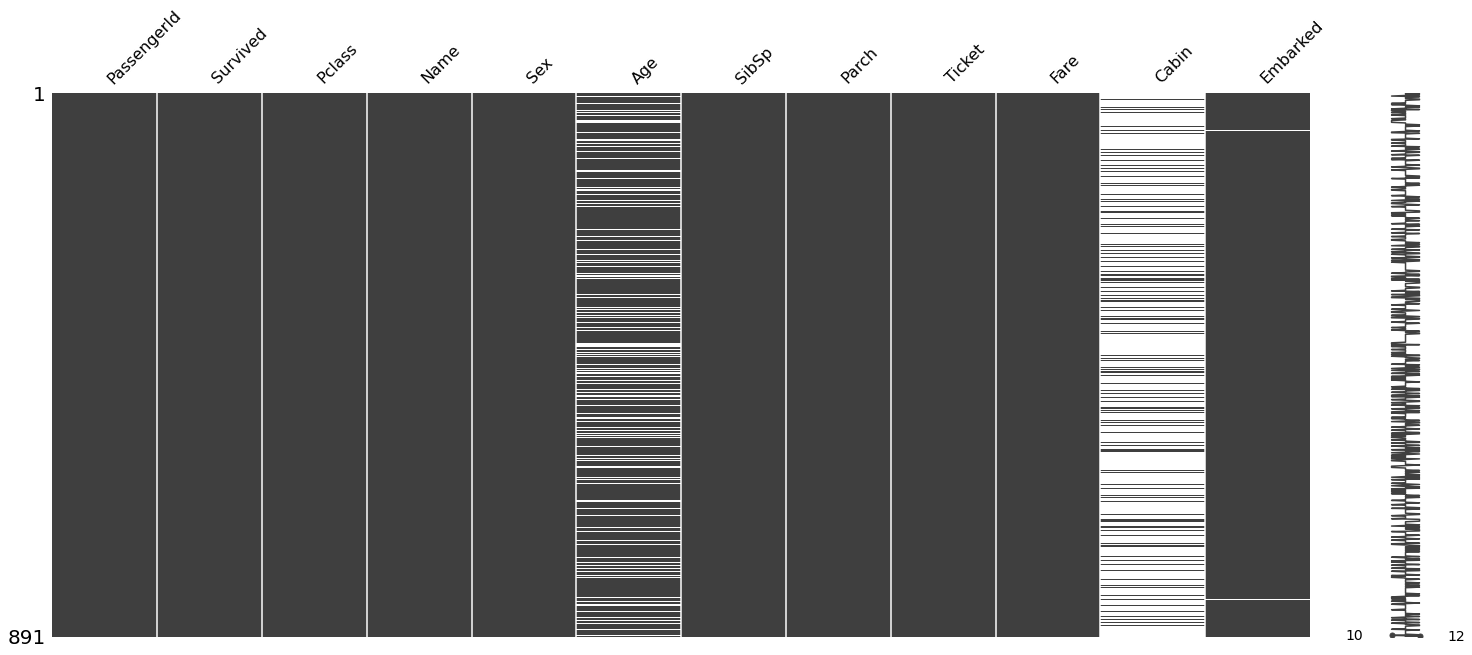

In [10]:
missingno.matrix(train)

<AxesSubplot:>

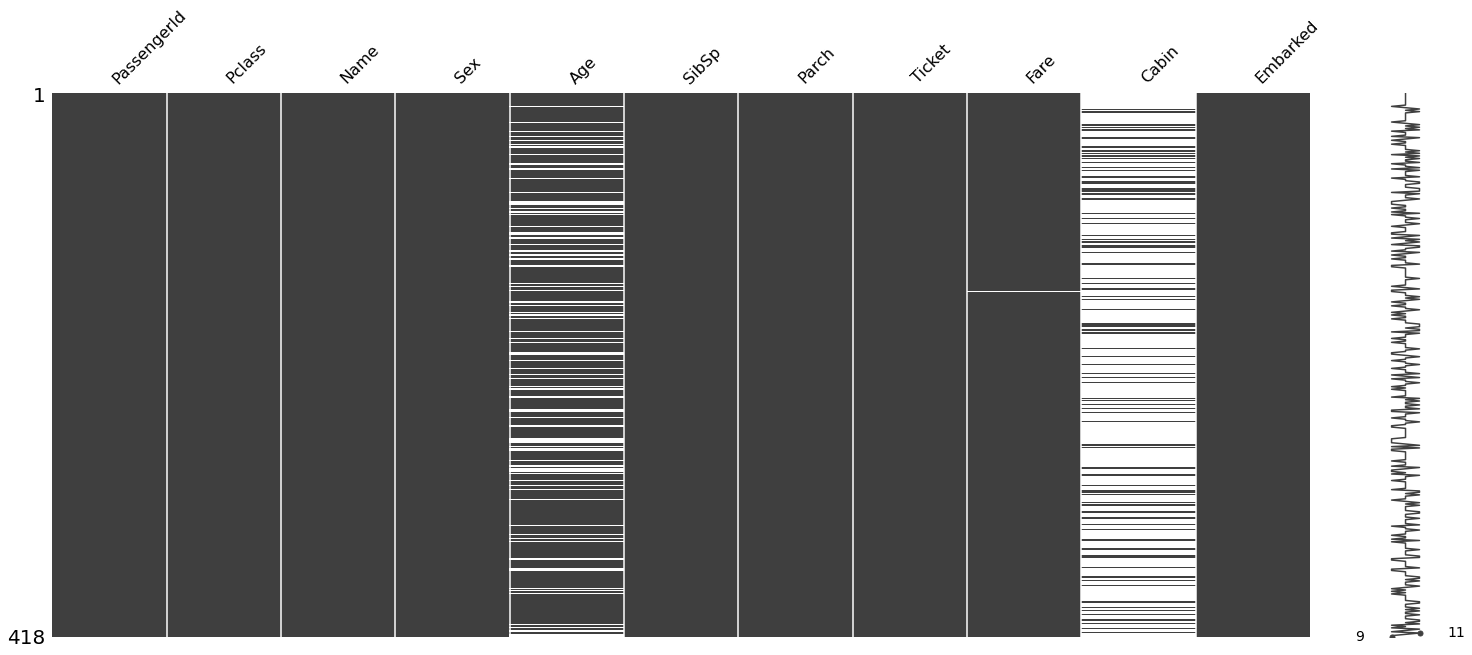

In [11]:
missingno.matrix(test)

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Feature Analysis

In [14]:
train['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'survival probability by gender')

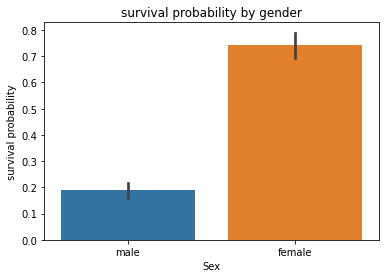

In [15]:
sns.barplot(x ='Sex', y='Survived', data = train)
plt.ylabel('survival probability')
plt.title('survival probability by gender')

In [16]:
train[['Sex', 'Survived']].groupby(['Sex'],
                                         as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Survival by Passenger class')

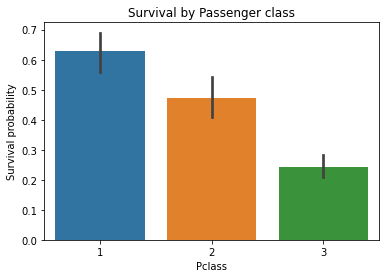

In [18]:
sns.barplot(x ='Pclass', y= 'Survived', data = train)
plt.ylabel('Survival probability')
plt.title('Survival by Passenger class')

In [19]:
train[['Pclass', 'Survived']].groupby(['Pclass'],
                                         as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Text(0.5, 1.0, 'Survival by family count ')

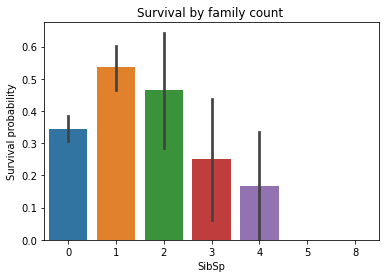

In [21]:
sns.barplot(x ='SibSp', y= 'Survived', data = train)
plt.ylabel('Survival probability')
plt.title('Survival by family count ')

In [22]:
train[['SibSp', 'Survived']].groupby(['SibSp'],
                                         as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [23]:
train['Parch'].value_counts(dropna = False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Text(0.5, 1.0, 'Survival by children count ')

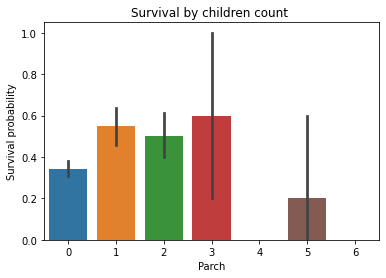

In [24]:
sns.barplot(x ='Parch', y= 'Survived', data = train)
plt.ylabel('Survival probability')
plt.title('Survival by children count ')

In [25]:
train[['Parch', 'Survived']].groupby(['Parch'],
                                         as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Suvival probability by sex and Passenger Class')

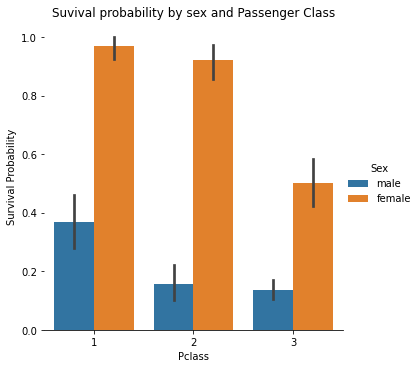

In [26]:
#survival by gender and class

g = sns.factorplot(x ='Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True) #this removes the left line
plt.ylabel('Survival Probability')
plt.title('Suvival probability by sex and Passenger Class')

Categorical variable

In [27]:
train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [28]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival by Point of Embarking')

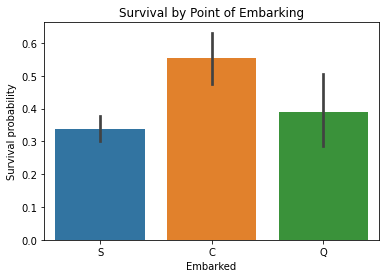

In [29]:
sns.barplot(x ='Embarked', y= 'Survived', data = train)
plt.ylabel('Survival probability')
plt.title('Survival by Point of Embarking')

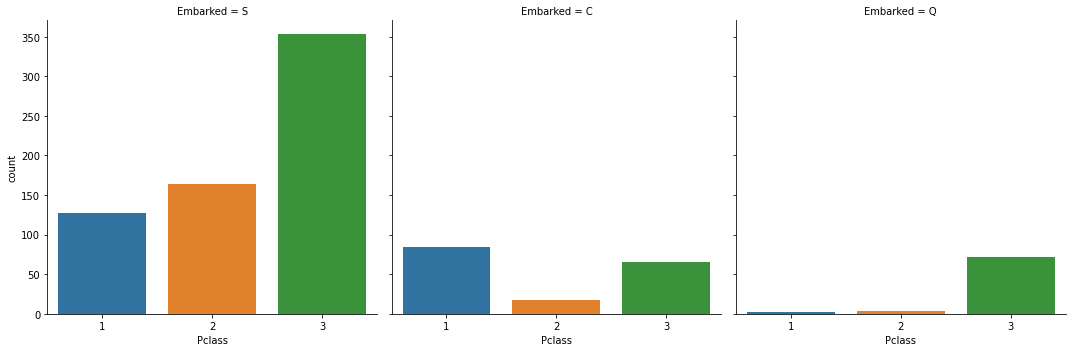

In [30]:
sns.factorplot('Pclass', col ='Embarked', data = train, kind = 'count')

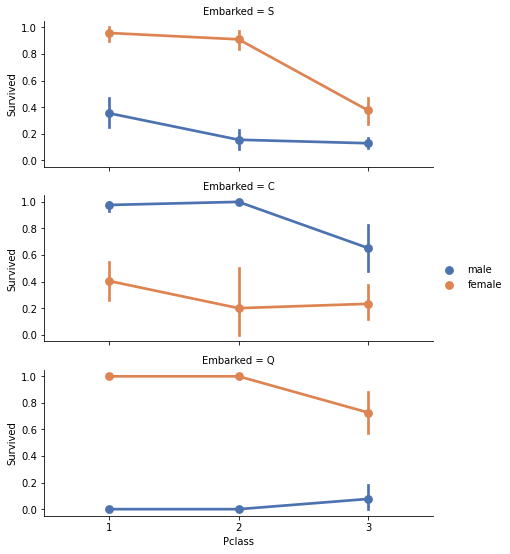

In [31]:
grid = sns.FacetGrid(train, row='Embarked', size=2.6, aspect=2.4)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

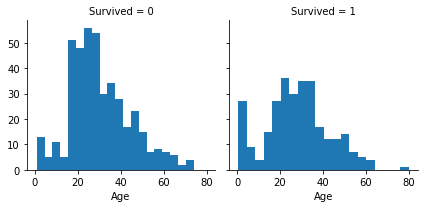

In [32]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

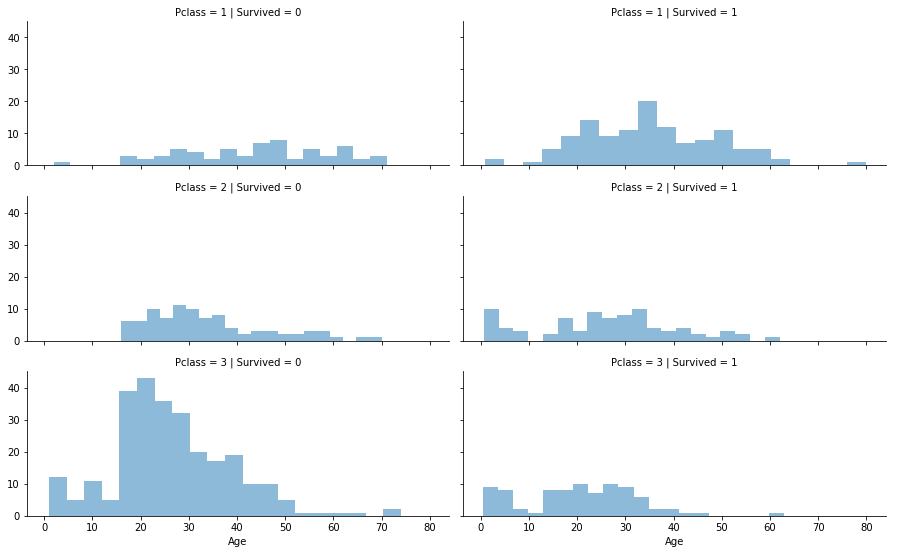

In [33]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.6, aspect=2.4)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [34]:
def detect_outliers(df, n, features):
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [35]:
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [36]:
print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


<AxesSubplot:>

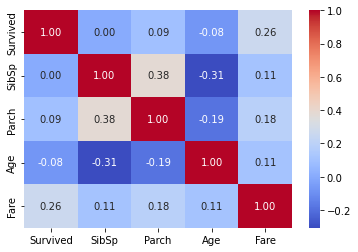

In [37]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')


In [38]:
train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

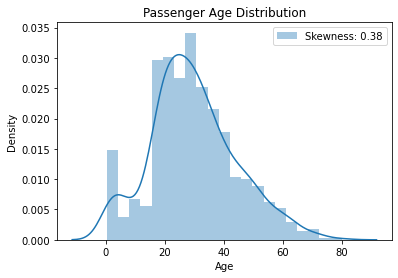

In [39]:
sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

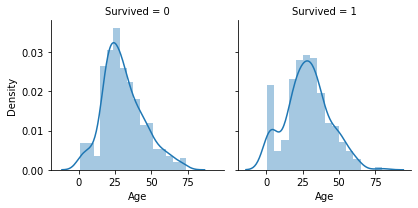

In [40]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

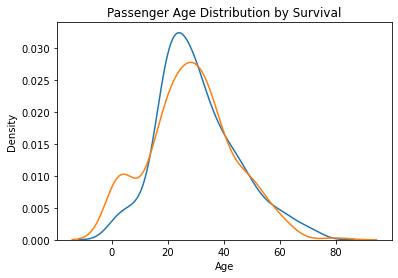

In [41]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

In [42]:
train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

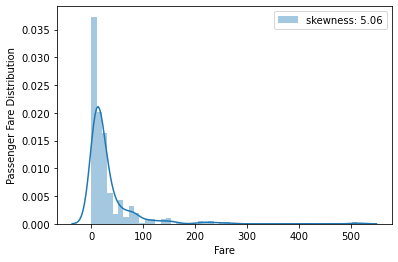

In [43]:
sns.distplot(train['Fare'], label = 'skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

In [44]:
train.drop(['Cabin', 'Ticket'], axis = 1, inplace = True)


In [45]:
test.drop(['Cabin', 'Ticket'], axis = 1, inplace = True)

In [46]:
train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [47]:
mode = train['Embarked'].dropna().mode()[0]

In [48]:
# Fill missing value in Embarked with mode

train['Embarked'].fillna(mode, inplace = True)

In [49]:
# Missing values in test set

test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [50]:
median = train['Fare'].dropna().median()
median

14.4542

In [51]:
train['Fare'].fillna(median, inplace = True)

In [52]:
combined = pd.concat([train, test], axis = 0).reset_index(drop = True)
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [53]:
combined.isnull().sum().sort_values(ascending = False)

Survived       418
Age            256
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Embarked         0
dtype: int64

In [54]:
combined['Sex'] = combined['Sex'].map({'male': 0,'female':1})

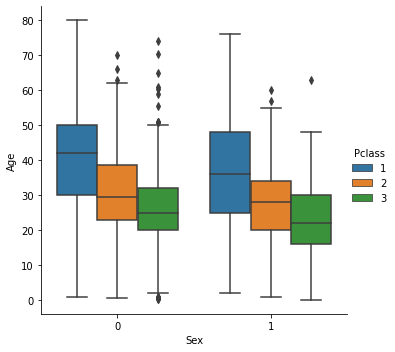

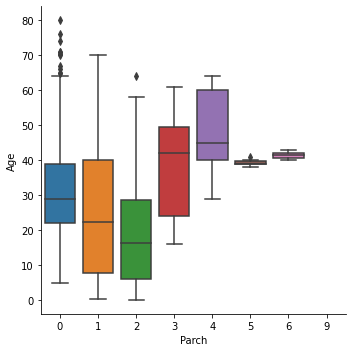

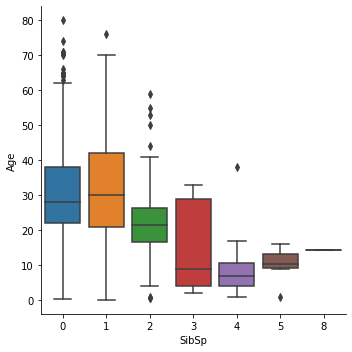

In [55]:
sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = combined)
sns.factorplot(y = 'Age', x = 'Parch', kind = 'box', data = combined)
sns.factorplot(y = 'Age', x = 'SibSp', kind = 'box', data = combined)

<AxesSubplot:>

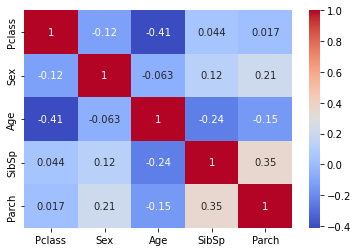

In [56]:
sns.heatmap(combined.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1). corr(), annot = True, cmap ='coolwarm')

In [57]:
# Check number of missing ages 

age_nan_indices = list(combined[combined['Age'].isnull()].index)
len(age_nan_indices)

256

In [58]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    median_age = combined['Age'].median()
    predict_age = combined['Age'][(combined['SibSp'] == combined.iloc[index]['SibSp']) 
                                 & (combined['Parch'] == combined.iloc[index]['Parch'])
                                 & (combined['Pclass'] == combined.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combined['Age'].iloc[index] = median_age
    else:
        combined['Age'].iloc[index] = predict_age

In [59]:
# Make sure there is no more missing ages 

combined['Age'].isnull().sum()

0

Text(0.5, 1.0, 'Passenger Fare Distribution')

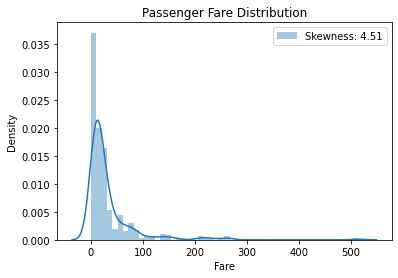

In [61]:
# Passenger fare distribution

sns.distplot(combined['Fare'], label = 'Skewness: %.2f'%(combined['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [62]:
combined['Fare'] = combined['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

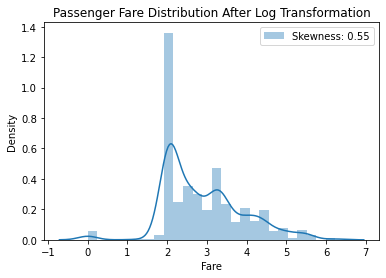

In [63]:
# Passenger fare distribution after log transformation

sns.distplot(combined['Fare'], label = 'Skewness: %.2f'%(combined['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

In [64]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [65]:
# Get title from name

combined['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combined['Name']]
combined[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [66]:
combined['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [67]:
combined['Title'] = combined['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combined['Title'] = combined['Title'].replace(['Mlle', 'Ms'], 'Miss')
combined['Title'] = combined['Title'].replace('Mme', 'Mrs')

<AxesSubplot:xlabel='Title', ylabel='count'>

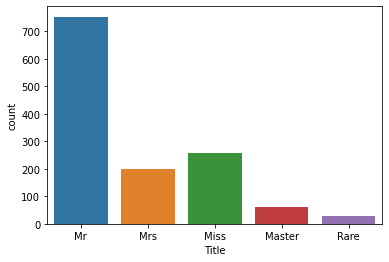

In [68]:
sns.countplot(combined['Title'])

In [69]:
# Mean of survival by name title

combined[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean of survival by Title')

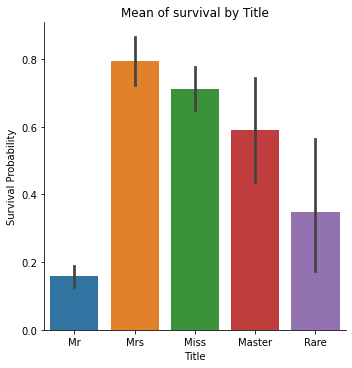

In [70]:
sns.factorplot(x = 'Title', y = 'Survived', data = combined, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [71]:
combined = combined.drop('Name', axis = 1)
combined.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


In [72]:
# Calculate family size from SibSp and Parch

combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1
combined[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [73]:
combined[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending =False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [74]:
combined['IsAlone'] = 0
combined.loc[combined['FamilySize'] == 1, 'IsAlone'] = 1

In [75]:
combined[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [76]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

combined = combined.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combined.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


In [77]:
# Create age bands and compute mean of survival by age bands

combined['AgeBand'] = pd.cut(combined['Age'], 5)
combined[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [78]:
combined.loc[combined['Age'] <= 16.136, 'Age'] = 0
combined.loc[(combined['Age'] > 16.136) & (combined['Age'] <= 32.102), 'Age'] = 1
combined.loc[(combined['Age'] > 32.102) & (combined['Age'] <= 48.068), 'Age'] = 2
combined.loc[(combined['Age'] > 48.068) & (combined['Age'] <= 64.034), 'Age'] = 3
combined.loc[combined['Age'] > 64.034 , 'Age'] = 4

In [79]:
# Drop age band feature

combined = combined.drop('AgeBand', axis = 1)

In [80]:
# Age and Pclass data types 

combined[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [81]:
# Convert ordinal Age into integer

combined['Age'] = combined['Age'].astype('int')
combined['Age'].dtype

dtype('int32')

In [82]:
# Create Age*Class feature

combined['Age*Class'] = combined['Age'] * combined['Pclass']
combined[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [83]:
combined = pd.get_dummies(combined, columns = ['Title'])

In [84]:
combined = pd.get_dummies(combined, columns = ['Embarked'], prefix = 'Em')

In [85]:
combined['FareBand'] = pd.cut(combined['Fare'], 4)
combined[['FareBand','Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by = 'Survived')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [86]:
combined.loc[combined['Fare'] <= 1.56, 'Fare'] = 0
combined.loc[(combined['Fare'] >1.56) & (combined['Fare'] <= 3.119), 'Fare'] = 1
combined.loc[(combined['Fare'] >3.119) & (combined['Fare'] <= 4.679), 'Fare'] = 2
combined.loc[combined['Fare'] >= 4.679, 'Fare'] = 3

In [87]:
combined['Fare'] = combined['Fare'].astype('int')

In [88]:
combined = combined.drop('FareBand', axis = 1)

In [89]:
combined.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [90]:

train = combined[:len(train)]
test = combined[len(train):]

In [91]:
train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [92]:
#Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [93]:
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
Fare            0
IsAlone         0
Age*Class       0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Rare      0
Em_C            0
Em_Q            0
Em_S            0
dtype: int64

In [94]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [95]:
test = test.drop('Survived', axis = 1)


In [96]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [97]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


### Logistic Regression

In [100]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_logreg = round(logreg.score(X_train, Y_train)* 100,2)
acc_logreg


80.93

In [116]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

In [103]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)* 100, 2)
acc_knn

84.34

In [106]:
guassian = GaussianNB()
guassian.fit(X_train, Y_train)
Y_pred = guassian.predict(X_test)
acc_guassian = round(guassian.score(X_train, Y_train)* 100, 2)
acc_guassian

79.11

In [107]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.57

In [108]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

In [109]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

72.99

In [110]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.7

In [111]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.7

In [112]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.00976
0:	learn: 0.6868136	total: 440ms	remaining: 7m 19s
1:	learn: 0.6798485	total: 446ms	remaining: 3m 42s
2:	learn: 0.6729520	total: 453ms	remaining: 2m 30s
3:	learn: 0.6669729	total: 459ms	remaining: 1m 54s
4:	learn: 0.6607853	total: 463ms	remaining: 1m 32s
5:	learn: 0.6554568	total: 466ms	remaining: 1m 17s
6:	learn: 0.6500727	total: 469ms	remaining: 1m 6s
7:	learn: 0.6437982	total: 472ms	remaining: 58.5s
8:	learn: 0.6398272	total: 474ms	remaining: 52.2s
9:	learn: 0.6351628	total: 477ms	remaining: 47.2s
10:	learn: 0.6305969	total: 480ms	remaining: 43.2s
11:	learn: 0.6252274	total: 483ms	remaining: 39.8s
12:	learn: 0.6203165	total: 486ms	remaining: 36.9s
13:	learn: 0.6163249	total: 487ms	remaining: 34.3s
14:	learn: 0.6126752	total: 488ms	remaining: 32.1s
15:	learn: 0.6078515	total: 490ms	remaining: 30.1s
16:	learn: 0.6033553	total: 491ms	remaining: 28.4s
17:	learn: 0.5984437	total: 493ms	remaining: 26.9s
18:	learn: 0.5935188	total: 495ms	remaining: 25.5s
19:	le

183:	learn: 0.3866947	total: 758ms	remaining: 3.36s
184:	learn: 0.3866733	total: 760ms	remaining: 3.35s
185:	learn: 0.3863664	total: 762ms	remaining: 3.33s
186:	learn: 0.3860633	total: 764ms	remaining: 3.32s
187:	learn: 0.3857716	total: 765ms	remaining: 3.31s
188:	learn: 0.3853905	total: 768ms	remaining: 3.29s
189:	learn: 0.3851364	total: 770ms	remaining: 3.28s
190:	learn: 0.3848890	total: 772ms	remaining: 3.27s
191:	learn: 0.3845631	total: 775ms	remaining: 3.26s
192:	learn: 0.3843842	total: 776ms	remaining: 3.25s
193:	learn: 0.3842803	total: 778ms	remaining: 3.23s
194:	learn: 0.3841751	total: 779ms	remaining: 3.22s
195:	learn: 0.3839814	total: 781ms	remaining: 3.21s
196:	learn: 0.3837436	total: 784ms	remaining: 3.19s
197:	learn: 0.3836233	total: 785ms	remaining: 3.18s
198:	learn: 0.3834190	total: 788ms	remaining: 3.17s
199:	learn: 0.3832746	total: 790ms	remaining: 3.16s
200:	learn: 0.3829874	total: 794ms	remaining: 3.15s
201:	learn: 0.3826506	total: 796ms	remaining: 3.15s
202:	learn: 

352:	learn: 0.3628362	total: 1.07s	remaining: 1.97s
353:	learn: 0.3627196	total: 1.07s	remaining: 1.96s
354:	learn: 0.3626984	total: 1.08s	remaining: 1.96s
355:	learn: 0.3625393	total: 1.08s	remaining: 1.95s
356:	learn: 0.3624853	total: 1.08s	remaining: 1.95s
357:	learn: 0.3624021	total: 1.08s	remaining: 1.94s
358:	learn: 0.3623386	total: 1.08s	remaining: 1.94s
359:	learn: 0.3622635	total: 1.09s	remaining: 1.93s
360:	learn: 0.3622490	total: 1.09s	remaining: 1.93s
361:	learn: 0.3621768	total: 1.09s	remaining: 1.92s
362:	learn: 0.3620411	total: 1.09s	remaining: 1.92s
363:	learn: 0.3619301	total: 1.09s	remaining: 1.91s
364:	learn: 0.3619248	total: 1.09s	remaining: 1.9s
365:	learn: 0.3618749	total: 1.09s	remaining: 1.9s
366:	learn: 0.3617780	total: 1.1s	remaining: 1.89s
367:	learn: 0.3616314	total: 1.1s	remaining: 1.89s
368:	learn: 0.3615511	total: 1.1s	remaining: 1.88s
369:	learn: 0.3614703	total: 1.1s	remaining: 1.88s
370:	learn: 0.3613689	total: 1.1s	remaining: 1.87s
371:	learn: 0.36126

561:	learn: 0.3499182	total: 1.4s	remaining: 1.09s
562:	learn: 0.3499014	total: 1.4s	remaining: 1.09s
563:	learn: 0.3498341	total: 1.41s	remaining: 1.09s
564:	learn: 0.3497704	total: 1.41s	remaining: 1.08s
565:	learn: 0.3497683	total: 1.41s	remaining: 1.08s
566:	learn: 0.3497535	total: 1.41s	remaining: 1.08s
567:	learn: 0.3496656	total: 1.41s	remaining: 1.07s
568:	learn: 0.3496473	total: 1.41s	remaining: 1.07s
569:	learn: 0.3496353	total: 1.41s	remaining: 1.07s
570:	learn: 0.3495768	total: 1.42s	remaining: 1.06s
571:	learn: 0.3495608	total: 1.42s	remaining: 1.06s
572:	learn: 0.3494940	total: 1.42s	remaining: 1.06s
573:	learn: 0.3494887	total: 1.42s	remaining: 1.05s
574:	learn: 0.3494097	total: 1.42s	remaining: 1.05s
575:	learn: 0.3493427	total: 1.42s	remaining: 1.05s
576:	learn: 0.3493226	total: 1.43s	remaining: 1.04s
577:	learn: 0.3492725	total: 1.43s	remaining: 1.04s
578:	learn: 0.3492197	total: 1.43s	remaining: 1.04s
579:	learn: 0.3491881	total: 1.43s	remaining: 1.03s
580:	learn: 0.

773:	learn: 0.3410254	total: 1.73s	remaining: 505ms
774:	learn: 0.3409796	total: 1.73s	remaining: 503ms
775:	learn: 0.3408831	total: 1.73s	remaining: 501ms
776:	learn: 0.3408153	total: 1.74s	remaining: 498ms
777:	learn: 0.3407581	total: 1.74s	remaining: 496ms
778:	learn: 0.3407215	total: 1.74s	remaining: 493ms
779:	learn: 0.3406594	total: 1.74s	remaining: 491ms
780:	learn: 0.3406125	total: 1.74s	remaining: 489ms
781:	learn: 0.3405431	total: 1.74s	remaining: 486ms
782:	learn: 0.3405189	total: 1.75s	remaining: 484ms
783:	learn: 0.3404714	total: 1.75s	remaining: 481ms
784:	learn: 0.3404282	total: 1.75s	remaining: 479ms
785:	learn: 0.3403957	total: 1.75s	remaining: 477ms
786:	learn: 0.3403406	total: 1.75s	remaining: 474ms
787:	learn: 0.3403188	total: 1.75s	remaining: 472ms
788:	learn: 0.3402912	total: 1.75s	remaining: 469ms
789:	learn: 0.3402622	total: 1.76s	remaining: 467ms
790:	learn: 0.3402041	total: 1.76s	remaining: 465ms
791:	learn: 0.3401702	total: 1.76s	remaining: 462ms
792:	learn: 

979:	learn: 0.3333743	total: 2.06s	remaining: 42.1ms
980:	learn: 0.3333472	total: 2.06s	remaining: 40ms
981:	learn: 0.3333265	total: 2.06s	remaining: 37.9ms
982:	learn: 0.3333022	total: 2.07s	remaining: 35.7ms
983:	learn: 0.3332792	total: 2.07s	remaining: 33.6ms
984:	learn: 0.3332596	total: 2.07s	remaining: 31.5ms
985:	learn: 0.3332502	total: 2.07s	remaining: 29.4ms
986:	learn: 0.3332080	total: 2.07s	remaining: 27.3ms
987:	learn: 0.3331780	total: 2.07s	remaining: 25.2ms
988:	learn: 0.3331332	total: 2.08s	remaining: 23.1ms
989:	learn: 0.3331055	total: 2.08s	remaining: 21ms
990:	learn: 0.3330841	total: 2.08s	remaining: 18.9ms
991:	learn: 0.3330485	total: 2.08s	remaining: 16.8ms
992:	learn: 0.3330035	total: 2.08s	remaining: 14.7ms
993:	learn: 0.3329715	total: 2.08s	remaining: 12.6ms
994:	learn: 0.3329285	total: 2.08s	remaining: 10.5ms
995:	learn: 0.3329040	total: 2.09s	remaining: 8.38ms
996:	learn: 0.3328743	total: 2.09s	remaining: 6.29ms
997:	learn: 0.3328296	total: 2.09s	remaining: 4.19

In [113]:
acc_catboost

85.7

In [117]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_logreg, acc_random_forest, acc_guassian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,85.70
1,Decision Tree,85.70
2,CatBoost,85.70
3,KNN,84.34
4,Support Vector Machines,83.09
5,Logistic Regression,80.93
6,Linear SVC,80.25
7,Perceptron,79.57
8,Naive Bayes,79.11
9,Stochastic Gradient Decent,72.99


In [118]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [119]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6870154	total: 2.5ms	remaining: 2.5s
1:	learn: 0.6803102	total: 4.05ms	remaining: 2.02s
2:	learn: 0.6743326	total: 5.67ms	remaining: 1.89s
3:	learn: 0.6684760	total: 7.56ms	remaining: 1.88s
4:	learn: 0.6624557	total: 9.24ms	remaining: 1.84s
5:	learn: 0.6573314	total: 10.8ms	remaining: 1.79s
6:	learn: 0.6520748	total: 12.4ms	remaining: 1.76s
7:	learn: 0.6460856	total: 14.1ms	remaining: 1.75s
8:	learn: 0.6422711	total: 15.4ms	remaining: 1.69s
9:	learn: 0.6376840	total: 16.9ms	remaining: 1.67s
10:	learn: 0.6326541	total: 18.5ms	remaining: 1.66s
11:	learn: 0.6272334	total: 20ms	remaining: 1.65s
12:	learn: 0.6224744	total: 21.6ms	remaining: 1.64s
13:	learn: 0.6175199	total: 23.1ms	remaining: 1.63s
14:	learn: 0.6124417	total: 24.6ms	remaining: 1.62s
15:	learn: 0.6097890	total: 25.6ms	remaining: 1.57s
16:	learn: 0.6050558	total: 27.1ms	remaining: 1.57s
17:	learn: 0.6004952	total: 28.7ms	remaining: 1.56s
18:	learn: 0.5958639	total: 30.2ms	remaining: 1.

224:	learn: 0.3760580	total: 385ms	remaining: 1.32s
225:	learn: 0.3758568	total: 387ms	remaining: 1.32s
226:	learn: 0.3758345	total: 388ms	remaining: 1.32s
227:	learn: 0.3756135	total: 389ms	remaining: 1.32s
228:	learn: 0.3754478	total: 391ms	remaining: 1.32s
229:	learn: 0.3752261	total: 393ms	remaining: 1.31s
230:	learn: 0.3750549	total: 394ms	remaining: 1.31s
231:	learn: 0.3748098	total: 396ms	remaining: 1.31s
232:	learn: 0.3745700	total: 397ms	remaining: 1.31s
233:	learn: 0.3743302	total: 399ms	remaining: 1.3s
234:	learn: 0.3741645	total: 400ms	remaining: 1.3s
235:	learn: 0.3739733	total: 402ms	remaining: 1.3s
236:	learn: 0.3737216	total: 403ms	remaining: 1.3s
237:	learn: 0.3736151	total: 405ms	remaining: 1.3s
238:	learn: 0.3735707	total: 406ms	remaining: 1.29s
239:	learn: 0.3734171	total: 408ms	remaining: 1.29s
240:	learn: 0.3731652	total: 409ms	remaining: 1.29s
241:	learn: 0.3729565	total: 411ms	remaining: 1.29s
242:	learn: 0.3727640	total: 412ms	remaining: 1.28s
243:	learn: 0.372

418:	learn: 0.3528009	total: 712ms	remaining: 987ms
419:	learn: 0.3527983	total: 713ms	remaining: 984ms
420:	learn: 0.3526747	total: 715ms	remaining: 983ms
421:	learn: 0.3525552	total: 716ms	remaining: 981ms
422:	learn: 0.3524764	total: 718ms	remaining: 979ms
423:	learn: 0.3524234	total: 719ms	remaining: 977ms
424:	learn: 0.3523517	total: 721ms	remaining: 975ms
425:	learn: 0.3523133	total: 722ms	remaining: 973ms
426:	learn: 0.3522031	total: 724ms	remaining: 971ms
427:	learn: 0.3520956	total: 725ms	remaining: 969ms
428:	learn: 0.3520106	total: 727ms	remaining: 967ms
429:	learn: 0.3519574	total: 728ms	remaining: 965ms
430:	learn: 0.3518900	total: 730ms	remaining: 963ms
431:	learn: 0.3517893	total: 731ms	remaining: 961ms
432:	learn: 0.3517141	total: 733ms	remaining: 959ms
433:	learn: 0.3516505	total: 734ms	remaining: 957ms
434:	learn: 0.3516088	total: 735ms	remaining: 955ms
435:	learn: 0.3515139	total: 737ms	remaining: 953ms
436:	learn: 0.3514468	total: 738ms	remaining: 951ms
437:	learn: 

626:	learn: 0.3405546	total: 1.04s	remaining: 616ms
627:	learn: 0.3404910	total: 1.04s	remaining: 615ms
628:	learn: 0.3404397	total: 1.04s	remaining: 613ms
629:	learn: 0.3404399	total: 1.04s	remaining: 612ms
630:	learn: 0.3404091	total: 1.04s	remaining: 611ms
631:	learn: 0.3403148	total: 1.05s	remaining: 610ms
632:	learn: 0.3402863	total: 1.05s	remaining: 608ms
633:	learn: 0.3402313	total: 1.05s	remaining: 607ms
634:	learn: 0.3401831	total: 1.05s	remaining: 605ms
635:	learn: 0.3401357	total: 1.05s	remaining: 603ms
636:	learn: 0.3401161	total: 1.05s	remaining: 601ms
637:	learn: 0.3400681	total: 1.06s	remaining: 600ms
638:	learn: 0.3399664	total: 1.06s	remaining: 598ms
639:	learn: 0.3398785	total: 1.06s	remaining: 596ms
640:	learn: 0.3398402	total: 1.06s	remaining: 594ms
641:	learn: 0.3398352	total: 1.06s	remaining: 592ms
642:	learn: 0.3398096	total: 1.07s	remaining: 592ms
643:	learn: 0.3397421	total: 1.07s	remaining: 591ms
644:	learn: 0.3397294	total: 1.07s	remaining: 590ms
645:	learn: 

830:	learn: 0.3310938	total: 1.35s	remaining: 275ms
831:	learn: 0.3310882	total: 1.35s	remaining: 274ms
832:	learn: 0.3310197	total: 1.36s	remaining: 272ms
833:	learn: 0.3309859	total: 1.36s	remaining: 270ms
834:	learn: 0.3309523	total: 1.36s	remaining: 269ms
835:	learn: 0.3309056	total: 1.36s	remaining: 267ms
836:	learn: 0.3308495	total: 1.36s	remaining: 266ms
837:	learn: 0.3307758	total: 1.36s	remaining: 264ms
838:	learn: 0.3307287	total: 1.37s	remaining: 262ms
839:	learn: 0.3306895	total: 1.37s	remaining: 261ms
840:	learn: 0.3306368	total: 1.37s	remaining: 259ms
841:	learn: 0.3305893	total: 1.37s	remaining: 257ms
842:	learn: 0.3305537	total: 1.37s	remaining: 256ms
843:	learn: 0.3305086	total: 1.37s	remaining: 254ms
844:	learn: 0.3304242	total: 1.38s	remaining: 252ms
845:	learn: 0.3303922	total: 1.38s	remaining: 251ms
846:	learn: 0.3303395	total: 1.38s	remaining: 249ms
847:	learn: 0.3303063	total: 1.38s	remaining: 247ms
848:	learn: 0.3302427	total: 1.38s	remaining: 246ms
849:	learn: 

Learning rate set to 0.009331
0:	learn: 0.6869381	total: 4.82ms	remaining: 4.81s
1:	learn: 0.6815679	total: 10ms	remaining: 5.01s
2:	learn: 0.6779477	total: 24ms	remaining: 7.97s
3:	learn: 0.6715465	total: 26.6ms	remaining: 6.63s
4:	learn: 0.6660257	total: 28.9ms	remaining: 5.76s
5:	learn: 0.6612567	total: 30.9ms	remaining: 5.12s
6:	learn: 0.6555796	total: 33.3ms	remaining: 4.72s
7:	learn: 0.6499929	total: 35.6ms	remaining: 4.42s
8:	learn: 0.6449620	total: 38ms	remaining: 4.18s
9:	learn: 0.6392656	total: 42.1ms	remaining: 4.17s
10:	learn: 0.6346019	total: 45.3ms	remaining: 4.07s
11:	learn: 0.6291850	total: 48.2ms	remaining: 3.96s
12:	learn: 0.6252388	total: 50.7ms	remaining: 3.85s
13:	learn: 0.6204141	total: 52.4ms	remaining: 3.69s
14:	learn: 0.6158605	total: 54.2ms	remaining: 3.56s
15:	learn: 0.6108704	total: 57.8ms	remaining: 3.56s
16:	learn: 0.6057113	total: 60.3ms	remaining: 3.49s
17:	learn: 0.6008714	total: 63ms	remaining: 3.44s
18:	learn: 0.5963858	total: 64.7ms	remaining: 3.34s


245:	learn: 0.3776268	total: 484ms	remaining: 1.48s
246:	learn: 0.3776128	total: 485ms	remaining: 1.48s
247:	learn: 0.3774967	total: 487ms	remaining: 1.48s
248:	learn: 0.3773384	total: 488ms	remaining: 1.47s
249:	learn: 0.3771732	total: 491ms	remaining: 1.47s
250:	learn: 0.3770833	total: 494ms	remaining: 1.47s
251:	learn: 0.3769373	total: 496ms	remaining: 1.47s
252:	learn: 0.3767993	total: 499ms	remaining: 1.47s
253:	learn: 0.3766648	total: 501ms	remaining: 1.47s
254:	learn: 0.3763919	total: 502ms	remaining: 1.47s
255:	learn: 0.3761774	total: 504ms	remaining: 1.46s
256:	learn: 0.3760099	total: 505ms	remaining: 1.46s
257:	learn: 0.3758748	total: 507ms	remaining: 1.46s
258:	learn: 0.3757512	total: 508ms	remaining: 1.45s
259:	learn: 0.3756243	total: 510ms	remaining: 1.45s
260:	learn: 0.3754744	total: 513ms	remaining: 1.45s
261:	learn: 0.3752939	total: 514ms	remaining: 1.45s
262:	learn: 0.3750733	total: 516ms	remaining: 1.45s
263:	learn: 0.3749029	total: 517ms	remaining: 1.44s
264:	learn: 

426:	learn: 0.3585662	total: 805ms	remaining: 1.08s
427:	learn: 0.3584539	total: 807ms	remaining: 1.08s
428:	learn: 0.3583617	total: 809ms	remaining: 1.08s
429:	learn: 0.3583366	total: 810ms	remaining: 1.07s
430:	learn: 0.3582873	total: 817ms	remaining: 1.08s
431:	learn: 0.3581703	total: 820ms	remaining: 1.08s
432:	learn: 0.3580649	total: 821ms	remaining: 1.07s
433:	learn: 0.3579957	total: 823ms	remaining: 1.07s
434:	learn: 0.3578894	total: 824ms	remaining: 1.07s
435:	learn: 0.3577667	total: 826ms	remaining: 1.07s
436:	learn: 0.3577073	total: 828ms	remaining: 1.07s
437:	learn: 0.3576160	total: 829ms	remaining: 1.06s
438:	learn: 0.3575370	total: 831ms	remaining: 1.06s
439:	learn: 0.3574546	total: 833ms	remaining: 1.06s
440:	learn: 0.3573719	total: 839ms	remaining: 1.06s
441:	learn: 0.3573114	total: 841ms	remaining: 1.06s
442:	learn: 0.3572069	total: 843ms	remaining: 1.06s
443:	learn: 0.3571342	total: 845ms	remaining: 1.06s
444:	learn: 0.3571164	total: 846ms	remaining: 1.05s
445:	learn: 

607:	learn: 0.3478417	total: 1.13s	remaining: 730ms
608:	learn: 0.3477774	total: 1.13s	remaining: 728ms
609:	learn: 0.3477238	total: 1.14s	remaining: 726ms
610:	learn: 0.3476707	total: 1.14s	remaining: 724ms
611:	learn: 0.3476236	total: 1.14s	remaining: 723ms
612:	learn: 0.3475814	total: 1.14s	remaining: 722ms
613:	learn: 0.3475417	total: 1.15s	remaining: 720ms
614:	learn: 0.3474860	total: 1.15s	remaining: 718ms
615:	learn: 0.3474367	total: 1.15s	remaining: 716ms
616:	learn: 0.3473680	total: 1.15s	remaining: 714ms
617:	learn: 0.3473223	total: 1.15s	remaining: 712ms
618:	learn: 0.3472803	total: 1.15s	remaining: 710ms
619:	learn: 0.3472150	total: 1.15s	remaining: 708ms
620:	learn: 0.3471987	total: 1.16s	remaining: 705ms
621:	learn: 0.3471466	total: 1.16s	remaining: 703ms
622:	learn: 0.3470872	total: 1.16s	remaining: 701ms
623:	learn: 0.3470397	total: 1.16s	remaining: 701ms
624:	learn: 0.3470133	total: 1.17s	remaining: 700ms
625:	learn: 0.3469349	total: 1.17s	remaining: 698ms
626:	learn: 

785:	learn: 0.3391832	total: 1.45s	remaining: 395ms
786:	learn: 0.3391364	total: 1.45s	remaining: 393ms
787:	learn: 0.3390793	total: 1.45s	remaining: 391ms
788:	learn: 0.3390372	total: 1.46s	remaining: 389ms
789:	learn: 0.3389630	total: 1.46s	remaining: 388ms
790:	learn: 0.3389085	total: 1.46s	remaining: 386ms
791:	learn: 0.3388793	total: 1.47s	remaining: 385ms
792:	learn: 0.3388316	total: 1.47s	remaining: 383ms
793:	learn: 0.3387942	total: 1.47s	remaining: 381ms
794:	learn: 0.3387195	total: 1.47s	remaining: 379ms
795:	learn: 0.3386998	total: 1.47s	remaining: 377ms
796:	learn: 0.3386627	total: 1.47s	remaining: 375ms
797:	learn: 0.3386325	total: 1.47s	remaining: 373ms
798:	learn: 0.3385818	total: 1.48s	remaining: 371ms
799:	learn: 0.3385328	total: 1.48s	remaining: 370ms
800:	learn: 0.3384952	total: 1.48s	remaining: 368ms
801:	learn: 0.3384511	total: 1.48s	remaining: 366ms
802:	learn: 0.3383978	total: 1.49s	remaining: 365ms
803:	learn: 0.3383568	total: 1.49s	remaining: 363ms
804:	learn: 

958:	learn: 0.3324629	total: 1.78s	remaining: 76.3ms
959:	learn: 0.3324319	total: 1.79s	remaining: 74.5ms
960:	learn: 0.3323987	total: 1.79s	remaining: 72.6ms
961:	learn: 0.3323659	total: 1.79s	remaining: 70.7ms
962:	learn: 0.3323452	total: 1.79s	remaining: 68.9ms
963:	learn: 0.3323166	total: 1.79s	remaining: 67ms
964:	learn: 0.3322813	total: 1.8s	remaining: 65.1ms
965:	learn: 0.3322519	total: 1.8s	remaining: 63.3ms
966:	learn: 0.3322227	total: 1.8s	remaining: 61.4ms
967:	learn: 0.3321816	total: 1.8s	remaining: 59.6ms
968:	learn: 0.3321540	total: 1.81s	remaining: 57.8ms
969:	learn: 0.3321303	total: 1.81s	remaining: 55.9ms
970:	learn: 0.3320783	total: 1.81s	remaining: 54.1ms
971:	learn: 0.3320547	total: 1.81s	remaining: 52.2ms
972:	learn: 0.3320198	total: 1.81s	remaining: 50.3ms
973:	learn: 0.3320052	total: 1.81s	remaining: 48.5ms
974:	learn: 0.3319661	total: 1.82s	remaining: 46.6ms
975:	learn: 0.3319387	total: 1.82s	remaining: 44.7ms
976:	learn: 0.3319023	total: 1.82s	remaining: 42.9ms

177:	learn: 0.3715466	total: 320ms	remaining: 1.48s
178:	learn: 0.3711491	total: 322ms	remaining: 1.48s
179:	learn: 0.3708146	total: 324ms	remaining: 1.48s
180:	learn: 0.3703525	total: 325ms	remaining: 1.47s
181:	learn: 0.3699484	total: 327ms	remaining: 1.47s
182:	learn: 0.3699125	total: 328ms	remaining: 1.46s
183:	learn: 0.3695819	total: 329ms	remaining: 1.46s
184:	learn: 0.3692644	total: 331ms	remaining: 1.46s
185:	learn: 0.3688061	total: 333ms	remaining: 1.46s
186:	learn: 0.3684875	total: 336ms	remaining: 1.46s
187:	learn: 0.3681954	total: 339ms	remaining: 1.46s
188:	learn: 0.3681529	total: 341ms	remaining: 1.46s
189:	learn: 0.3679840	total: 342ms	remaining: 1.46s
190:	learn: 0.3676638	total: 344ms	remaining: 1.46s
191:	learn: 0.3673348	total: 345ms	remaining: 1.45s
192:	learn: 0.3670507	total: 347ms	remaining: 1.45s
193:	learn: 0.3666790	total: 348ms	remaining: 1.45s
194:	learn: 0.3663378	total: 350ms	remaining: 1.44s
195:	learn: 0.3659349	total: 351ms	remaining: 1.44s
196:	learn: 

351:	learn: 0.3432546	total: 636ms	remaining: 1.17s
352:	learn: 0.3431269	total: 638ms	remaining: 1.17s
353:	learn: 0.3430287	total: 640ms	remaining: 1.17s
354:	learn: 0.3429890	total: 641ms	remaining: 1.17s
355:	learn: 0.3429279	total: 643ms	remaining: 1.16s
356:	learn: 0.3428384	total: 644ms	remaining: 1.16s
357:	learn: 0.3428363	total: 645ms	remaining: 1.16s
358:	learn: 0.3428134	total: 646ms	remaining: 1.15s
359:	learn: 0.3427622	total: 648ms	remaining: 1.15s
360:	learn: 0.3427143	total: 649ms	remaining: 1.15s
361:	learn: 0.3426050	total: 651ms	remaining: 1.15s
362:	learn: 0.3425636	total: 652ms	remaining: 1.14s
363:	learn: 0.3424634	total: 654ms	remaining: 1.14s
364:	learn: 0.3424368	total: 655ms	remaining: 1.14s
365:	learn: 0.3424033	total: 657ms	remaining: 1.14s
366:	learn: 0.3423177	total: 658ms	remaining: 1.14s
367:	learn: 0.3423117	total: 659ms	remaining: 1.13s
368:	learn: 0.3420921	total: 661ms	remaining: 1.13s
369:	learn: 0.3419563	total: 662ms	remaining: 1.13s
370:	learn: 

552:	learn: 0.3290446	total: 961ms	remaining: 777ms
553:	learn: 0.3289679	total: 963ms	remaining: 775ms
554:	learn: 0.3289132	total: 965ms	remaining: 773ms
555:	learn: 0.3288756	total: 966ms	remaining: 772ms
556:	learn: 0.3287948	total: 968ms	remaining: 770ms
557:	learn: 0.3287416	total: 970ms	remaining: 768ms
558:	learn: 0.3286758	total: 971ms	remaining: 766ms
559:	learn: 0.3286378	total: 972ms	remaining: 764ms
560:	learn: 0.3285811	total: 974ms	remaining: 762ms
561:	learn: 0.3285222	total: 975ms	remaining: 760ms
562:	learn: 0.3284854	total: 977ms	remaining: 758ms
563:	learn: 0.3284001	total: 978ms	remaining: 756ms
564:	learn: 0.3283638	total: 980ms	remaining: 754ms
565:	learn: 0.3282991	total: 982ms	remaining: 753ms
566:	learn: 0.3282841	total: 984ms	remaining: 751ms
567:	learn: 0.3282687	total: 985ms	remaining: 749ms
568:	learn: 0.3282640	total: 986ms	remaining: 747ms
569:	learn: 0.3282307	total: 988ms	remaining: 745ms
570:	learn: 0.3281396	total: 989ms	remaining: 743ms
571:	learn: 

733:	learn: 0.3208944	total: 1.28s	remaining: 466ms
734:	learn: 0.3208525	total: 1.29s	remaining: 465ms
735:	learn: 0.3208229	total: 1.29s	remaining: 463ms
736:	learn: 0.3207724	total: 1.29s	remaining: 462ms
737:	learn: 0.3207193	total: 1.29s	remaining: 460ms
738:	learn: 0.3206941	total: 1.3s	remaining: 458ms
739:	learn: 0.3206415	total: 1.3s	remaining: 456ms
740:	learn: 0.3205770	total: 1.3s	remaining: 454ms
741:	learn: 0.3205362	total: 1.3s	remaining: 453ms
742:	learn: 0.3205035	total: 1.3s	remaining: 451ms
743:	learn: 0.3204678	total: 1.31s	remaining: 450ms
744:	learn: 0.3204299	total: 1.31s	remaining: 448ms
745:	learn: 0.3203755	total: 1.31s	remaining: 446ms
746:	learn: 0.3203375	total: 1.31s	remaining: 444ms
747:	learn: 0.3202820	total: 1.31s	remaining: 442ms
748:	learn: 0.3202617	total: 1.31s	remaining: 440ms
749:	learn: 0.3202112	total: 1.31s	remaining: 439ms
750:	learn: 0.3201915	total: 1.32s	remaining: 437ms
751:	learn: 0.3201501	total: 1.32s	remaining: 435ms
752:	learn: 0.320

913:	learn: 0.3134949	total: 1.61s	remaining: 152ms
914:	learn: 0.3134771	total: 1.61s	remaining: 150ms
915:	learn: 0.3134336	total: 1.62s	remaining: 148ms
916:	learn: 0.3133966	total: 1.62s	remaining: 146ms
917:	learn: 0.3133660	total: 1.62s	remaining: 145ms
918:	learn: 0.3133438	total: 1.62s	remaining: 143ms
919:	learn: 0.3132930	total: 1.62s	remaining: 141ms
920:	learn: 0.3132568	total: 1.62s	remaining: 139ms
921:	learn: 0.3132271	total: 1.63s	remaining: 138ms
922:	learn: 0.3131881	total: 1.63s	remaining: 136ms
923:	learn: 0.3131633	total: 1.64s	remaining: 135ms
924:	learn: 0.3131328	total: 1.64s	remaining: 133ms
925:	learn: 0.3130850	total: 1.64s	remaining: 131ms
926:	learn: 0.3130170	total: 1.64s	remaining: 129ms
927:	learn: 0.3129578	total: 1.64s	remaining: 127ms
928:	learn: 0.3129327	total: 1.64s	remaining: 126ms
929:	learn: 0.3129176	total: 1.65s	remaining: 124ms
930:	learn: 0.3128641	total: 1.65s	remaining: 122ms
931:	learn: 0.3128271	total: 1.65s	remaining: 120ms
932:	learn: 

143:	learn: 0.4047927	total: 286ms	remaining: 1.7s
144:	learn: 0.4045731	total: 287ms	remaining: 1.7s
145:	learn: 0.4039424	total: 289ms	remaining: 1.69s
146:	learn: 0.4035240	total: 291ms	remaining: 1.69s
147:	learn: 0.4028352	total: 293ms	remaining: 1.69s
148:	learn: 0.4024129	total: 295ms	remaining: 1.68s
149:	learn: 0.4018636	total: 297ms	remaining: 1.68s
150:	learn: 0.4012771	total: 298ms	remaining: 1.68s
151:	learn: 0.4007772	total: 300ms	remaining: 1.67s
152:	learn: 0.4002100	total: 302ms	remaining: 1.67s
153:	learn: 0.3999724	total: 304ms	remaining: 1.67s
154:	learn: 0.3995950	total: 305ms	remaining: 1.67s
155:	learn: 0.3992341	total: 307ms	remaining: 1.66s
156:	learn: 0.3987585	total: 309ms	remaining: 1.66s
157:	learn: 0.3984121	total: 311ms	remaining: 1.66s
158:	learn: 0.3981413	total: 313ms	remaining: 1.66s
159:	learn: 0.3978692	total: 315ms	remaining: 1.66s
160:	learn: 0.3975883	total: 317ms	remaining: 1.65s
161:	learn: 0.3972070	total: 319ms	remaining: 1.65s
162:	learn: 0.

388:	learn: 0.3629814	total: 767ms	remaining: 1.2s
389:	learn: 0.3629051	total: 770ms	remaining: 1.2s
390:	learn: 0.3627473	total: 773ms	remaining: 1.2s
391:	learn: 0.3626005	total: 775ms	remaining: 1.2s
392:	learn: 0.3624490	total: 777ms	remaining: 1.2s
393:	learn: 0.3623968	total: 778ms	remaining: 1.2s
394:	learn: 0.3623955	total: 780ms	remaining: 1.19s
395:	learn: 0.3623445	total: 782ms	remaining: 1.19s
396:	learn: 0.3622168	total: 783ms	remaining: 1.19s
397:	learn: 0.3621876	total: 785ms	remaining: 1.19s
398:	learn: 0.3621097	total: 787ms	remaining: 1.18s
399:	learn: 0.3620870	total: 788ms	remaining: 1.18s
400:	learn: 0.3619178	total: 791ms	remaining: 1.18s
401:	learn: 0.3618634	total: 793ms	remaining: 1.18s
402:	learn: 0.3617209	total: 795ms	remaining: 1.18s
403:	learn: 0.3616415	total: 796ms	remaining: 1.17s
404:	learn: 0.3616270	total: 797ms	remaining: 1.17s
405:	learn: 0.3615732	total: 799ms	remaining: 1.17s
406:	learn: 0.3615453	total: 800ms	remaining: 1.17s
407:	learn: 0.3615

566:	learn: 0.3517215	total: 1.06s	remaining: 813ms
567:	learn: 0.3516231	total: 1.06s	remaining: 811ms
568:	learn: 0.3515519	total: 1.07s	remaining: 809ms
569:	learn: 0.3515476	total: 1.07s	remaining: 807ms
570:	learn: 0.3515373	total: 1.07s	remaining: 805ms
571:	learn: 0.3515247	total: 1.07s	remaining: 803ms
572:	learn: 0.3514752	total: 1.07s	remaining: 801ms
573:	learn: 0.3514689	total: 1.07s	remaining: 798ms
574:	learn: 0.3514132	total: 1.08s	remaining: 796ms
575:	learn: 0.3513613	total: 1.08s	remaining: 794ms
576:	learn: 0.3513149	total: 1.08s	remaining: 792ms
577:	learn: 0.3512334	total: 1.08s	remaining: 791ms
578:	learn: 0.3511513	total: 1.08s	remaining: 789ms
579:	learn: 0.3511460	total: 1.09s	remaining: 787ms
580:	learn: 0.3511004	total: 1.09s	remaining: 786ms
581:	learn: 0.3510117	total: 1.09s	remaining: 784ms
582:	learn: 0.3509473	total: 1.09s	remaining: 782ms
583:	learn: 0.3508461	total: 1.09s	remaining: 780ms
584:	learn: 0.3508063	total: 1.09s	remaining: 777ms
585:	learn: 

743:	learn: 0.3432217	total: 1.39s	remaining: 478ms
744:	learn: 0.3432050	total: 1.39s	remaining: 476ms
745:	learn: 0.3431455	total: 1.39s	remaining: 474ms
746:	learn: 0.3431121	total: 1.39s	remaining: 472ms
747:	learn: 0.3430350	total: 1.39s	remaining: 470ms
748:	learn: 0.3429934	total: 1.4s	remaining: 468ms
749:	learn: 0.3429661	total: 1.4s	remaining: 466ms
750:	learn: 0.3429186	total: 1.4s	remaining: 464ms
751:	learn: 0.3428938	total: 1.4s	remaining: 462ms
752:	learn: 0.3428174	total: 1.4s	remaining: 460ms
753:	learn: 0.3427834	total: 1.4s	remaining: 458ms
754:	learn: 0.3427768	total: 1.4s	remaining: 456ms
755:	learn: 0.3427193	total: 1.41s	remaining: 454ms
756:	learn: 0.3426721	total: 1.41s	remaining: 452ms
757:	learn: 0.3426618	total: 1.41s	remaining: 450ms
758:	learn: 0.3426084	total: 1.41s	remaining: 448ms
759:	learn: 0.3425390	total: 1.41s	remaining: 446ms
760:	learn: 0.3425097	total: 1.41s	remaining: 444ms
761:	learn: 0.3424675	total: 1.41s	remaining: 442ms
762:	learn: 0.34242

941:	learn: 0.3350342	total: 1.71s	remaining: 106ms
942:	learn: 0.3349965	total: 1.72s	remaining: 104ms
943:	learn: 0.3349464	total: 1.72s	remaining: 102ms
944:	learn: 0.3349091	total: 1.72s	remaining: 100ms
945:	learn: 0.3348744	total: 1.72s	remaining: 98.2ms
946:	learn: 0.3348338	total: 1.72s	remaining: 96.4ms
947:	learn: 0.3348132	total: 1.72s	remaining: 94.5ms
948:	learn: 0.3347755	total: 1.72s	remaining: 92.7ms
949:	learn: 0.3347458	total: 1.73s	remaining: 90.9ms
950:	learn: 0.3347147	total: 1.73s	remaining: 89ms
951:	learn: 0.3347144	total: 1.73s	remaining: 87.2ms
952:	learn: 0.3346787	total: 1.73s	remaining: 85.3ms
953:	learn: 0.3346325	total: 1.73s	remaining: 83.5ms
954:	learn: 0.3346082	total: 1.73s	remaining: 81.7ms
955:	learn: 0.3345798	total: 1.73s	remaining: 79.8ms
956:	learn: 0.3345586	total: 1.74s	remaining: 78ms
957:	learn: 0.3345203	total: 1.74s	remaining: 76.2ms
958:	learn: 0.3344821	total: 1.74s	remaining: 74.4ms
959:	learn: 0.3344633	total: 1.74s	remaining: 72.5ms
9

191:	learn: 0.3901599	total: 327ms	remaining: 1.38s
192:	learn: 0.3897854	total: 329ms	remaining: 1.38s
193:	learn: 0.3895898	total: 331ms	remaining: 1.37s
194:	learn: 0.3894752	total: 332ms	remaining: 1.37s
195:	learn: 0.3892214	total: 334ms	remaining: 1.37s
196:	learn: 0.3889552	total: 336ms	remaining: 1.37s
197:	learn: 0.3887801	total: 337ms	remaining: 1.37s
198:	learn: 0.3887464	total: 338ms	remaining: 1.36s
199:	learn: 0.3886259	total: 340ms	remaining: 1.36s
200:	learn: 0.3882967	total: 344ms	remaining: 1.37s
201:	learn: 0.3879500	total: 347ms	remaining: 1.37s
202:	learn: 0.3877841	total: 350ms	remaining: 1.37s
203:	learn: 0.3873540	total: 352ms	remaining: 1.37s
204:	learn: 0.3870362	total: 354ms	remaining: 1.37s
205:	learn: 0.3867817	total: 355ms	remaining: 1.37s
206:	learn: 0.3864526	total: 357ms	remaining: 1.37s
207:	learn: 0.3862719	total: 358ms	remaining: 1.36s
208:	learn: 0.3860930	total: 360ms	remaining: 1.36s
209:	learn: 0.3857353	total: 363ms	remaining: 1.36s
210:	learn: 

357:	learn: 0.3660365	total: 639ms	remaining: 1.15s
358:	learn: 0.3658767	total: 641ms	remaining: 1.14s
359:	learn: 0.3658200	total: 643ms	remaining: 1.14s
360:	learn: 0.3656768	total: 644ms	remaining: 1.14s
361:	learn: 0.3655865	total: 646ms	remaining: 1.14s
362:	learn: 0.3654608	total: 647ms	remaining: 1.14s
363:	learn: 0.3653711	total: 649ms	remaining: 1.13s
364:	learn: 0.3652305	total: 651ms	remaining: 1.13s
365:	learn: 0.3650933	total: 652ms	remaining: 1.13s
366:	learn: 0.3649429	total: 654ms	remaining: 1.13s
367:	learn: 0.3649319	total: 656ms	remaining: 1.13s
368:	learn: 0.3648705	total: 658ms	remaining: 1.13s
369:	learn: 0.3648047	total: 660ms	remaining: 1.12s
370:	learn: 0.3646705	total: 661ms	remaining: 1.12s
371:	learn: 0.3646118	total: 663ms	remaining: 1.12s
372:	learn: 0.3644768	total: 664ms	remaining: 1.12s
373:	learn: 0.3644040	total: 666ms	remaining: 1.11s
374:	learn: 0.3643752	total: 667ms	remaining: 1.11s
375:	learn: 0.3642621	total: 669ms	remaining: 1.11s
376:	learn: 

528:	learn: 0.3537473	total: 951ms	remaining: 847ms
529:	learn: 0.3537131	total: 953ms	remaining: 845ms
530:	learn: 0.3536702	total: 954ms	remaining: 843ms
531:	learn: 0.3536140	total: 956ms	remaining: 841ms
532:	learn: 0.3536048	total: 958ms	remaining: 839ms
533:	learn: 0.3535739	total: 964ms	remaining: 841ms
534:	learn: 0.3535667	total: 966ms	remaining: 840ms
535:	learn: 0.3535047	total: 968ms	remaining: 838ms
536:	learn: 0.3534839	total: 970ms	remaining: 836ms
537:	learn: 0.3533807	total: 971ms	remaining: 834ms
538:	learn: 0.3533686	total: 973ms	remaining: 832ms
539:	learn: 0.3533011	total: 975ms	remaining: 831ms
540:	learn: 0.3532492	total: 979ms	remaining: 830ms
541:	learn: 0.3532376	total: 981ms	remaining: 829ms
542:	learn: 0.3531516	total: 985ms	remaining: 829ms
543:	learn: 0.3531484	total: 987ms	remaining: 828ms
544:	learn: 0.3530695	total: 989ms	remaining: 826ms
545:	learn: 0.3530289	total: 991ms	remaining: 824ms
546:	learn: 0.3529892	total: 993ms	remaining: 822ms
547:	learn: 

751:	learn: 0.3431708	total: 1.41s	remaining: 467ms
752:	learn: 0.3431531	total: 1.42s	remaining: 465ms
753:	learn: 0.3431345	total: 1.42s	remaining: 463ms
754:	learn: 0.3430619	total: 1.42s	remaining: 461ms
755:	learn: 0.3430165	total: 1.42s	remaining: 459ms
756:	learn: 0.3429497	total: 1.42s	remaining: 457ms
757:	learn: 0.3428996	total: 1.43s	remaining: 455ms
758:	learn: 0.3428748	total: 1.43s	remaining: 454ms
759:	learn: 0.3428711	total: 1.43s	remaining: 452ms
760:	learn: 0.3428462	total: 1.43s	remaining: 450ms
761:	learn: 0.3427963	total: 1.44s	remaining: 448ms
762:	learn: 0.3427761	total: 1.44s	remaining: 446ms
763:	learn: 0.3427293	total: 1.44s	remaining: 445ms
764:	learn: 0.3426912	total: 1.44s	remaining: 443ms
765:	learn: 0.3426456	total: 1.44s	remaining: 441ms
766:	learn: 0.3426147	total: 1.45s	remaining: 439ms
767:	learn: 0.3425619	total: 1.45s	remaining: 438ms
768:	learn: 0.3425097	total: 1.45s	remaining: 436ms
769:	learn: 0.3424557	total: 1.45s	remaining: 434ms
770:	learn: 

973:	learn: 0.3345862	total: 1.89s	remaining: 50.4ms
974:	learn: 0.3345646	total: 1.89s	remaining: 48.4ms
975:	learn: 0.3345235	total: 1.89s	remaining: 46.5ms
976:	learn: 0.3344929	total: 1.89s	remaining: 44.6ms
977:	learn: 0.3344465	total: 1.9s	remaining: 42.6ms
978:	learn: 0.3343949	total: 1.9s	remaining: 40.7ms
979:	learn: 0.3343763	total: 1.9s	remaining: 38.8ms
980:	learn: 0.3343569	total: 1.9s	remaining: 36.8ms
981:	learn: 0.3343240	total: 1.9s	remaining: 34.9ms
982:	learn: 0.3342896	total: 1.9s	remaining: 32.9ms
983:	learn: 0.3342638	total: 1.91s	remaining: 31ms
984:	learn: 0.3342249	total: 1.91s	remaining: 29.1ms
985:	learn: 0.3342024	total: 1.91s	remaining: 27.1ms
986:	learn: 0.3341599	total: 1.91s	remaining: 25.2ms
987:	learn: 0.3341214	total: 1.91s	remaining: 23.3ms
988:	learn: 0.3340742	total: 1.92s	remaining: 21.3ms
989:	learn: 0.3340253	total: 1.92s	remaining: 19.4ms
990:	learn: 0.3340077	total: 1.92s	remaining: 17.4ms
991:	learn: 0.3339859	total: 1.92s	remaining: 15.5ms
9

144:	learn: 0.4022460	total: 303ms	remaining: 1.78s
145:	learn: 0.4017984	total: 304ms	remaining: 1.78s
146:	learn: 0.4014154	total: 306ms	remaining: 1.77s
147:	learn: 0.4010133	total: 307ms	remaining: 1.77s
148:	learn: 0.4006429	total: 309ms	remaining: 1.76s
149:	learn: 0.4002094	total: 311ms	remaining: 1.76s
150:	learn: 0.3997586	total: 312ms	remaining: 1.75s
151:	learn: 0.3992958	total: 314ms	remaining: 1.75s
152:	learn: 0.3988429	total: 315ms	remaining: 1.74s
153:	learn: 0.3984891	total: 317ms	remaining: 1.74s
154:	learn: 0.3981769	total: 319ms	remaining: 1.74s
155:	learn: 0.3975363	total: 321ms	remaining: 1.73s
156:	learn: 0.3972188	total: 322ms	remaining: 1.73s
157:	learn: 0.3968567	total: 324ms	remaining: 1.73s
158:	learn: 0.3964807	total: 326ms	remaining: 1.72s
159:	learn: 0.3962339	total: 327ms	remaining: 1.72s
160:	learn: 0.3961197	total: 328ms	remaining: 1.71s
161:	learn: 0.3958492	total: 330ms	remaining: 1.71s
162:	learn: 0.3954300	total: 331ms	remaining: 1.7s
163:	learn: 0

304:	learn: 0.3681002	total: 625ms	remaining: 1.42s
305:	learn: 0.3679517	total: 627ms	remaining: 1.42s
306:	learn: 0.3678507	total: 629ms	remaining: 1.42s
307:	learn: 0.3677315	total: 632ms	remaining: 1.42s
308:	learn: 0.3677153	total: 633ms	remaining: 1.42s
309:	learn: 0.3676694	total: 636ms	remaining: 1.42s
310:	learn: 0.3676149	total: 638ms	remaining: 1.41s
311:	learn: 0.3675352	total: 643ms	remaining: 1.42s
312:	learn: 0.3674857	total: 645ms	remaining: 1.42s
313:	learn: 0.3673542	total: 647ms	remaining: 1.41s
314:	learn: 0.3672323	total: 649ms	remaining: 1.41s
315:	learn: 0.3670822	total: 651ms	remaining: 1.41s
316:	learn: 0.3669781	total: 653ms	remaining: 1.41s
317:	learn: 0.3668303	total: 655ms	remaining: 1.4s
318:	learn: 0.3666995	total: 657ms	remaining: 1.4s
319:	learn: 0.3665730	total: 659ms	remaining: 1.4s
320:	learn: 0.3665236	total: 661ms	remaining: 1.4s
321:	learn: 0.3663921	total: 663ms	remaining: 1.4s
322:	learn: 0.3663774	total: 664ms	remaining: 1.39s
323:	learn: 0.366

526:	learn: 0.3522156	total: 1.09s	remaining: 983ms
527:	learn: 0.3521363	total: 1.1s	remaining: 981ms
528:	learn: 0.3520538	total: 1.1s	remaining: 979ms
529:	learn: 0.3519861	total: 1.1s	remaining: 977ms
530:	learn: 0.3518708	total: 1.1s	remaining: 974ms
531:	learn: 0.3518069	total: 1.1s	remaining: 972ms
532:	learn: 0.3517232	total: 1.11s	remaining: 970ms
533:	learn: 0.3516496	total: 1.11s	remaining: 968ms
534:	learn: 0.3516467	total: 1.11s	remaining: 965ms
535:	learn: 0.3515802	total: 1.11s	remaining: 964ms
536:	learn: 0.3515545	total: 1.11s	remaining: 962ms
537:	learn: 0.3514924	total: 1.12s	remaining: 960ms
538:	learn: 0.3514419	total: 1.12s	remaining: 959ms
539:	learn: 0.3514358	total: 1.12s	remaining: 957ms
540:	learn: 0.3513596	total: 1.13s	remaining: 956ms
541:	learn: 0.3513503	total: 1.13s	remaining: 953ms
542:	learn: 0.3513002	total: 1.13s	remaining: 951ms
543:	learn: 0.3512505	total: 1.13s	remaining: 949ms
544:	learn: 0.3512395	total: 1.13s	remaining: 946ms
545:	learn: 0.351

747:	learn: 0.3426401	total: 1.55s	remaining: 524ms
748:	learn: 0.3426158	total: 1.56s	remaining: 522ms
749:	learn: 0.3425907	total: 1.56s	remaining: 520ms
750:	learn: 0.3425704	total: 1.56s	remaining: 518ms
751:	learn: 0.3425470	total: 1.56s	remaining: 515ms
752:	learn: 0.3425058	total: 1.56s	remaining: 513ms
753:	learn: 0.3424641	total: 1.57s	remaining: 511ms
754:	learn: 0.3423927	total: 1.57s	remaining: 509ms
755:	learn: 0.3423254	total: 1.57s	remaining: 507ms
756:	learn: 0.3422996	total: 1.57s	remaining: 505ms
757:	learn: 0.3422803	total: 1.57s	remaining: 503ms
758:	learn: 0.3422462	total: 1.58s	remaining: 500ms
759:	learn: 0.3422015	total: 1.58s	remaining: 498ms
760:	learn: 0.3421475	total: 1.58s	remaining: 496ms
761:	learn: 0.3421088	total: 1.58s	remaining: 494ms
762:	learn: 0.3420796	total: 1.58s	remaining: 492ms
763:	learn: 0.3420760	total: 1.58s	remaining: 490ms
764:	learn: 0.3420169	total: 1.59s	remaining: 487ms
765:	learn: 0.3419690	total: 1.59s	remaining: 485ms
766:	learn: 

979:	learn: 0.3344479	total: 2.03s	remaining: 41.4ms
980:	learn: 0.3344138	total: 2.03s	remaining: 39.3ms
981:	learn: 0.3343682	total: 2.03s	remaining: 37.3ms
982:	learn: 0.3343495	total: 2.04s	remaining: 35.2ms
983:	learn: 0.3343201	total: 2.04s	remaining: 33.1ms
984:	learn: 0.3342986	total: 2.04s	remaining: 31.1ms
985:	learn: 0.3342837	total: 2.04s	remaining: 29ms
986:	learn: 0.3342648	total: 2.04s	remaining: 26.9ms
987:	learn: 0.3342377	total: 2.05s	remaining: 24.9ms
988:	learn: 0.3341968	total: 2.05s	remaining: 22.8ms
989:	learn: 0.3341680	total: 2.05s	remaining: 20.7ms
990:	learn: 0.3341416	total: 2.05s	remaining: 18.6ms
991:	learn: 0.3341136	total: 2.05s	remaining: 16.6ms
992:	learn: 0.3340884	total: 2.06s	remaining: 14.5ms
993:	learn: 0.3340536	total: 2.06s	remaining: 12.4ms
994:	learn: 0.3340115	total: 2.06s	remaining: 10.4ms
995:	learn: 0.3339918	total: 2.06s	remaining: 8.29ms
996:	learn: 0.3339557	total: 2.07s	remaining: 6.22ms
997:	learn: 0.3339139	total: 2.07s	remaining: 4.

149:	learn: 0.3973168	total: 309ms	remaining: 1.75s
150:	learn: 0.3970218	total: 311ms	remaining: 1.75s
151:	learn: 0.3966112	total: 313ms	remaining: 1.74s
152:	learn: 0.3961796	total: 314ms	remaining: 1.74s
153:	learn: 0.3956607	total: 316ms	remaining: 1.73s
154:	learn: 0.3952013	total: 317ms	remaining: 1.73s
155:	learn: 0.3946727	total: 319ms	remaining: 1.72s
156:	learn: 0.3942408	total: 320ms	remaining: 1.72s
157:	learn: 0.3937863	total: 323ms	remaining: 1.72s
158:	learn: 0.3935641	total: 325ms	remaining: 1.72s
159:	learn: 0.3933682	total: 326ms	remaining: 1.71s
160:	learn: 0.3929499	total: 328ms	remaining: 1.71s
161:	learn: 0.3927559	total: 329ms	remaining: 1.7s
162:	learn: 0.3925621	total: 330ms	remaining: 1.7s
163:	learn: 0.3922741	total: 332ms	remaining: 1.69s
164:	learn: 0.3918845	total: 333ms	remaining: 1.69s
165:	learn: 0.3915284	total: 335ms	remaining: 1.68s
166:	learn: 0.3911025	total: 337ms	remaining: 1.68s
167:	learn: 0.3907273	total: 339ms	remaining: 1.68s
168:	learn: 0.

346:	learn: 0.3609192	total: 636ms	remaining: 1.2s
347:	learn: 0.3607546	total: 638ms	remaining: 1.2s
348:	learn: 0.3606348	total: 640ms	remaining: 1.19s
349:	learn: 0.3604892	total: 641ms	remaining: 1.19s
350:	learn: 0.3604200	total: 643ms	remaining: 1.19s
351:	learn: 0.3603263	total: 644ms	remaining: 1.19s
352:	learn: 0.3602954	total: 646ms	remaining: 1.18s
353:	learn: 0.3602564	total: 648ms	remaining: 1.18s
354:	learn: 0.3601680	total: 651ms	remaining: 1.18s
355:	learn: 0.3600464	total: 653ms	remaining: 1.18s
356:	learn: 0.3599158	total: 655ms	remaining: 1.18s
357:	learn: 0.3598334	total: 656ms	remaining: 1.18s
358:	learn: 0.3597400	total: 658ms	remaining: 1.17s
359:	learn: 0.3596617	total: 659ms	remaining: 1.17s
360:	learn: 0.3595379	total: 661ms	remaining: 1.17s
361:	learn: 0.3594356	total: 662ms	remaining: 1.17s
362:	learn: 0.3593383	total: 664ms	remaining: 1.16s
363:	learn: 0.3592543	total: 665ms	remaining: 1.16s
364:	learn: 0.3592262	total: 667ms	remaining: 1.16s
365:	learn: 0.

530:	learn: 0.3477030	total: 957ms	remaining: 845ms
531:	learn: 0.3476418	total: 958ms	remaining: 843ms
532:	learn: 0.3476167	total: 960ms	remaining: 841ms
533:	learn: 0.3475401	total: 962ms	remaining: 839ms
534:	learn: 0.3474520	total: 963ms	remaining: 837ms
535:	learn: 0.3474201	total: 965ms	remaining: 835ms
536:	learn: 0.3473089	total: 967ms	remaining: 833ms
537:	learn: 0.3472347	total: 968ms	remaining: 831ms
538:	learn: 0.3471518	total: 970ms	remaining: 829ms
539:	learn: 0.3471307	total: 971ms	remaining: 827ms
540:	learn: 0.3470741	total: 972ms	remaining: 825ms
541:	learn: 0.3470107	total: 974ms	remaining: 823ms
542:	learn: 0.3469971	total: 975ms	remaining: 821ms
543:	learn: 0.3468827	total: 977ms	remaining: 819ms
544:	learn: 0.3467592	total: 979ms	remaining: 817ms
545:	learn: 0.3466968	total: 980ms	remaining: 815ms
546:	learn: 0.3466701	total: 982ms	remaining: 813ms
547:	learn: 0.3466243	total: 983ms	remaining: 811ms
548:	learn: 0.3466129	total: 984ms	remaining: 809ms
549:	learn: 

701:	learn: 0.3393394	total: 1.27s	remaining: 541ms
702:	learn: 0.3393032	total: 1.27s	remaining: 539ms
703:	learn: 0.3392013	total: 1.28s	remaining: 537ms
704:	learn: 0.3391643	total: 1.28s	remaining: 535ms
705:	learn: 0.3390943	total: 1.28s	remaining: 533ms
706:	learn: 0.3390148	total: 1.28s	remaining: 531ms
707:	learn: 0.3389589	total: 1.28s	remaining: 529ms
708:	learn: 0.3389103	total: 1.28s	remaining: 527ms
709:	learn: 0.3388544	total: 1.29s	remaining: 525ms
710:	learn: 0.3388082	total: 1.29s	remaining: 524ms
711:	learn: 0.3388027	total: 1.29s	remaining: 522ms
712:	learn: 0.3387575	total: 1.29s	remaining: 520ms
713:	learn: 0.3386668	total: 1.29s	remaining: 518ms
714:	learn: 0.3386174	total: 1.29s	remaining: 516ms
715:	learn: 0.3385498	total: 1.29s	remaining: 514ms
716:	learn: 0.3385323	total: 1.3s	remaining: 512ms
717:	learn: 0.3385205	total: 1.3s	remaining: 510ms
718:	learn: 0.3384642	total: 1.3s	remaining: 508ms
719:	learn: 0.3384216	total: 1.3s	remaining: 506ms
720:	learn: 0.33

878:	learn: 0.3315946	total: 1.59s	remaining: 219ms
879:	learn: 0.3315761	total: 1.59s	remaining: 218ms
880:	learn: 0.3315257	total: 1.6s	remaining: 216ms
881:	learn: 0.3315177	total: 1.6s	remaining: 214ms
882:	learn: 0.3315100	total: 1.6s	remaining: 212ms
883:	learn: 0.3314436	total: 1.6s	remaining: 210ms
884:	learn: 0.3313821	total: 1.6s	remaining: 208ms
885:	learn: 0.3313359	total: 1.6s	remaining: 207ms
886:	learn: 0.3313013	total: 1.61s	remaining: 205ms
887:	learn: 0.3312744	total: 1.61s	remaining: 203ms
888:	learn: 0.3312120	total: 1.61s	remaining: 201ms
889:	learn: 0.3311716	total: 1.62s	remaining: 200ms
890:	learn: 0.3311375	total: 1.62s	remaining: 198ms
891:	learn: 0.3310925	total: 1.62s	remaining: 196ms
892:	learn: 0.3310592	total: 1.62s	remaining: 194ms
893:	learn: 0.3310130	total: 1.62s	remaining: 192ms
894:	learn: 0.3309704	total: 1.62s	remaining: 191ms
895:	learn: 0.3309432	total: 1.63s	remaining: 189ms
896:	learn: 0.3309138	total: 1.63s	remaining: 187ms
897:	learn: 0.3308

76:	learn: 0.4564325	total: 148ms	remaining: 1.77s
77:	learn: 0.4549024	total: 150ms	remaining: 1.77s
78:	learn: 0.4539037	total: 151ms	remaining: 1.76s
79:	learn: 0.4530405	total: 153ms	remaining: 1.75s
80:	learn: 0.4517364	total: 154ms	remaining: 1.75s
81:	learn: 0.4504148	total: 156ms	remaining: 1.74s
82:	learn: 0.4490846	total: 157ms	remaining: 1.74s
83:	learn: 0.4475795	total: 159ms	remaining: 1.73s
84:	learn: 0.4468536	total: 161ms	remaining: 1.73s
85:	learn: 0.4460818	total: 163ms	remaining: 1.73s
86:	learn: 0.4446861	total: 167ms	remaining: 1.75s
87:	learn: 0.4433462	total: 170ms	remaining: 1.76s
88:	learn: 0.4421122	total: 171ms	remaining: 1.75s
89:	learn: 0.4410175	total: 173ms	remaining: 1.75s
90:	learn: 0.4402190	total: 175ms	remaining: 1.75s
91:	learn: 0.4395597	total: 176ms	remaining: 1.74s
92:	learn: 0.4389729	total: 177ms	remaining: 1.73s
93:	learn: 0.4376670	total: 179ms	remaining: 1.73s
94:	learn: 0.4365478	total: 182ms	remaining: 1.73s
95:	learn: 0.4353465	total: 184

262:	learn: 0.3725460	total: 466ms	remaining: 1.3s
263:	learn: 0.3723630	total: 469ms	remaining: 1.31s
264:	learn: 0.3723504	total: 471ms	remaining: 1.31s
265:	learn: 0.3722104	total: 473ms	remaining: 1.3s
266:	learn: 0.3720501	total: 475ms	remaining: 1.3s
267:	learn: 0.3720313	total: 476ms	remaining: 1.3s
268:	learn: 0.3719668	total: 477ms	remaining: 1.3s
269:	learn: 0.3717892	total: 479ms	remaining: 1.29s
270:	learn: 0.3716393	total: 480ms	remaining: 1.29s
271:	learn: 0.3715251	total: 482ms	remaining: 1.29s
272:	learn: 0.3714612	total: 486ms	remaining: 1.29s
273:	learn: 0.3713254	total: 488ms	remaining: 1.29s
274:	learn: 0.3712914	total: 490ms	remaining: 1.29s
275:	learn: 0.3712147	total: 491ms	remaining: 1.29s
276:	learn: 0.3711140	total: 493ms	remaining: 1.29s
277:	learn: 0.3709691	total: 494ms	remaining: 1.28s
278:	learn: 0.3708876	total: 496ms	remaining: 1.28s
279:	learn: 0.3706075	total: 498ms	remaining: 1.28s
280:	learn: 0.3705631	total: 499ms	remaining: 1.28s
281:	learn: 0.370

440:	learn: 0.3564879	total: 785ms	remaining: 995ms
441:	learn: 0.3564098	total: 787ms	remaining: 993ms
442:	learn: 0.3562583	total: 789ms	remaining: 991ms
443:	learn: 0.3562480	total: 790ms	remaining: 989ms
444:	learn: 0.3562429	total: 791ms	remaining: 987ms
445:	learn: 0.3562235	total: 792ms	remaining: 984ms
446:	learn: 0.3561120	total: 794ms	remaining: 983ms
447:	learn: 0.3560507	total: 796ms	remaining: 981ms
448:	learn: 0.3559893	total: 798ms	remaining: 979ms
449:	learn: 0.3559194	total: 799ms	remaining: 977ms
450:	learn: 0.3558578	total: 801ms	remaining: 975ms
451:	learn: 0.3557837	total: 803ms	remaining: 974ms
452:	learn: 0.3557335	total: 805ms	remaining: 972ms
453:	learn: 0.3556544	total: 807ms	remaining: 970ms
454:	learn: 0.3555907	total: 808ms	remaining: 968ms
455:	learn: 0.3554792	total: 810ms	remaining: 966ms
456:	learn: 0.3554455	total: 811ms	remaining: 964ms
457:	learn: 0.3553983	total: 813ms	remaining: 962ms
458:	learn: 0.3553820	total: 814ms	remaining: 959ms
459:	learn: 

623:	learn: 0.3459335	total: 1.11s	remaining: 667ms
624:	learn: 0.3458954	total: 1.11s	remaining: 665ms
625:	learn: 0.3458467	total: 1.11s	remaining: 663ms
626:	learn: 0.3458416	total: 1.11s	remaining: 661ms
627:	learn: 0.3457782	total: 1.11s	remaining: 659ms
628:	learn: 0.3457663	total: 1.11s	remaining: 657ms
629:	learn: 0.3456790	total: 1.11s	remaining: 655ms
630:	learn: 0.3456131	total: 1.12s	remaining: 653ms
631:	learn: 0.3455348	total: 1.12s	remaining: 651ms
632:	learn: 0.3454548	total: 1.12s	remaining: 650ms
633:	learn: 0.3453983	total: 1.12s	remaining: 648ms
634:	learn: 0.3453558	total: 1.12s	remaining: 646ms
635:	learn: 0.3452619	total: 1.13s	remaining: 644ms
636:	learn: 0.3452195	total: 1.13s	remaining: 642ms
637:	learn: 0.3451753	total: 1.13s	remaining: 640ms
638:	learn: 0.3451263	total: 1.13s	remaining: 639ms
639:	learn: 0.3450850	total: 1.13s	remaining: 637ms
640:	learn: 0.3450688	total: 1.13s	remaining: 635ms
641:	learn: 0.3450478	total: 1.13s	remaining: 633ms
642:	learn: 

813:	learn: 0.3375509	total: 1.43s	remaining: 328ms
814:	learn: 0.3375090	total: 1.44s	remaining: 326ms
815:	learn: 0.3374914	total: 1.44s	remaining: 324ms
816:	learn: 0.3374622	total: 1.44s	remaining: 322ms
817:	learn: 0.3373924	total: 1.44s	remaining: 321ms
818:	learn: 0.3373617	total: 1.44s	remaining: 319ms
819:	learn: 0.3372847	total: 1.44s	remaining: 317ms
820:	learn: 0.3372454	total: 1.45s	remaining: 315ms
821:	learn: 0.3372205	total: 1.45s	remaining: 313ms
822:	learn: 0.3371685	total: 1.45s	remaining: 312ms
823:	learn: 0.3371462	total: 1.45s	remaining: 311ms
824:	learn: 0.3370889	total: 1.46s	remaining: 309ms
825:	learn: 0.3370727	total: 1.46s	remaining: 307ms
826:	learn: 0.3369883	total: 1.46s	remaining: 306ms
827:	learn: 0.3369438	total: 1.46s	remaining: 304ms
828:	learn: 0.3368683	total: 1.46s	remaining: 302ms
829:	learn: 0.3368208	total: 1.47s	remaining: 300ms
830:	learn: 0.3367641	total: 1.47s	remaining: 298ms
831:	learn: 0.3367107	total: 1.47s	remaining: 297ms
832:	learn: 

989:	learn: 0.3307476	total: 1.75s	remaining: 17.7ms
990:	learn: 0.3307138	total: 1.75s	remaining: 15.9ms
991:	learn: 0.3306907	total: 1.76s	remaining: 14.2ms
992:	learn: 0.3306604	total: 1.76s	remaining: 12.4ms
993:	learn: 0.3306158	total: 1.76s	remaining: 10.6ms
994:	learn: 0.3305884	total: 1.76s	remaining: 8.85ms
995:	learn: 0.3305563	total: 1.76s	remaining: 7.08ms
996:	learn: 0.3305263	total: 1.76s	remaining: 5.31ms
997:	learn: 0.3304994	total: 1.77s	remaining: 3.54ms
998:	learn: 0.3304552	total: 1.77s	remaining: 1.77ms
999:	learn: 0.3304275	total: 1.77s	remaining: 0us
Learning rate set to 0.009331
0:	learn: 0.6872024	total: 2.26ms	remaining: 2.26s
1:	learn: 0.6814878	total: 4.05ms	remaining: 2.02s
2:	learn: 0.6750117	total: 5.66ms	remaining: 1.88s
3:	learn: 0.6694460	total: 7.22ms	remaining: 1.8s
4:	learn: 0.6636834	total: 9.2ms	remaining: 1.83s
5:	learn: 0.6587264	total: 12ms	remaining: 1.99s
6:	learn: 0.6536288	total: 13.7ms	remaining: 1.94s
7:	learn: 0.6479771	total: 15.2ms	rem

184:	learn: 0.3958833	total: 322ms	remaining: 1.42s
185:	learn: 0.3956026	total: 324ms	remaining: 1.42s
186:	learn: 0.3952088	total: 326ms	remaining: 1.42s
187:	learn: 0.3948491	total: 328ms	remaining: 1.42s
188:	learn: 0.3947845	total: 329ms	remaining: 1.41s
189:	learn: 0.3945692	total: 330ms	remaining: 1.41s
190:	learn: 0.3942596	total: 332ms	remaining: 1.41s
191:	learn: 0.3939862	total: 336ms	remaining: 1.41s
192:	learn: 0.3936570	total: 338ms	remaining: 1.41s
193:	learn: 0.3933870	total: 341ms	remaining: 1.42s
194:	learn: 0.3930547	total: 343ms	remaining: 1.41s
195:	learn: 0.3927736	total: 344ms	remaining: 1.41s
196:	learn: 0.3924786	total: 346ms	remaining: 1.41s
197:	learn: 0.3922937	total: 347ms	remaining: 1.41s
198:	learn: 0.3919721	total: 349ms	remaining: 1.4s
199:	learn: 0.3918633	total: 350ms	remaining: 1.4s
200:	learn: 0.3916816	total: 352ms	remaining: 1.4s
201:	learn: 0.3915084	total: 354ms	remaining: 1.4s
202:	learn: 0.3913620	total: 356ms	remaining: 1.4s
203:	learn: 0.391

371:	learn: 0.3687563	total: 643ms	remaining: 1.09s
372:	learn: 0.3687074	total: 645ms	remaining: 1.08s
373:	learn: 0.3686215	total: 647ms	remaining: 1.08s
374:	learn: 0.3685318	total: 649ms	remaining: 1.08s
375:	learn: 0.3684938	total: 650ms	remaining: 1.08s
376:	learn: 0.3683707	total: 652ms	remaining: 1.08s
377:	learn: 0.3682468	total: 653ms	remaining: 1.07s
378:	learn: 0.3682392	total: 654ms	remaining: 1.07s
379:	learn: 0.3681245	total: 655ms	remaining: 1.07s
380:	learn: 0.3681115	total: 656ms	remaining: 1.07s
381:	learn: 0.3680014	total: 658ms	remaining: 1.06s
382:	learn: 0.3679536	total: 660ms	remaining: 1.06s
383:	learn: 0.3679011	total: 662ms	remaining: 1.06s
384:	learn: 0.3677739	total: 665ms	remaining: 1.06s
385:	learn: 0.3677246	total: 667ms	remaining: 1.06s
386:	learn: 0.3675774	total: 669ms	remaining: 1.06s
387:	learn: 0.3675470	total: 671ms	remaining: 1.06s
388:	learn: 0.3674326	total: 672ms	remaining: 1.05s
389:	learn: 0.3673498	total: 674ms	remaining: 1.05s
390:	learn: 

556:	learn: 0.3576016	total: 965ms	remaining: 767ms
557:	learn: 0.3575382	total: 966ms	remaining: 766ms
558:	learn: 0.3574649	total: 968ms	remaining: 764ms
559:	learn: 0.3574508	total: 970ms	remaining: 762ms
560:	learn: 0.3573634	total: 971ms	remaining: 760ms
561:	learn: 0.3573043	total: 973ms	remaining: 758ms
562:	learn: 0.3572355	total: 974ms	remaining: 756ms
563:	learn: 0.3572073	total: 976ms	remaining: 754ms
564:	learn: 0.3571755	total: 978ms	remaining: 753ms
565:	learn: 0.3571248	total: 979ms	remaining: 751ms
566:	learn: 0.3571052	total: 981ms	remaining: 749ms
567:	learn: 0.3570021	total: 982ms	remaining: 747ms
568:	learn: 0.3569583	total: 984ms	remaining: 745ms
569:	learn: 0.3569193	total: 985ms	remaining: 743ms
570:	learn: 0.3568790	total: 987ms	remaining: 741ms
571:	learn: 0.3568160	total: 988ms	remaining: 739ms
572:	learn: 0.3567743	total: 990ms	remaining: 738ms
573:	learn: 0.3567723	total: 991ms	remaining: 735ms
574:	learn: 0.3567570	total: 992ms	remaining: 733ms
575:	learn: 

741:	learn: 0.3489073	total: 1.29s	remaining: 449ms
742:	learn: 0.3488908	total: 1.29s	remaining: 447ms
743:	learn: 0.3488151	total: 1.29s	remaining: 445ms
744:	learn: 0.3487948	total: 1.29s	remaining: 443ms
745:	learn: 0.3486549	total: 1.3s	remaining: 441ms
746:	learn: 0.3486128	total: 1.3s	remaining: 440ms
747:	learn: 0.3485738	total: 1.3s	remaining: 439ms
748:	learn: 0.3485510	total: 1.3s	remaining: 437ms
749:	learn: 0.3485056	total: 1.31s	remaining: 436ms
750:	learn: 0.3484783	total: 1.31s	remaining: 434ms
751:	learn: 0.3484347	total: 1.31s	remaining: 432ms
752:	learn: 0.3484146	total: 1.31s	remaining: 431ms
753:	learn: 0.3484140	total: 1.31s	remaining: 429ms
754:	learn: 0.3483856	total: 1.31s	remaining: 427ms
755:	learn: 0.3483400	total: 1.32s	remaining: 425ms
756:	learn: 0.3483027	total: 1.32s	remaining: 424ms
757:	learn: 0.3482483	total: 1.32s	remaining: 422ms
758:	learn: 0.3482133	total: 1.32s	remaining: 420ms
759:	learn: 0.3481699	total: 1.33s	remaining: 419ms
760:	learn: 0.34

914:	learn: 0.3414046	total: 1.61s	remaining: 150ms
915:	learn: 0.3413815	total: 1.61s	remaining: 148ms
916:	learn: 0.3413316	total: 1.61s	remaining: 146ms
917:	learn: 0.3413077	total: 1.62s	remaining: 144ms
918:	learn: 0.3412736	total: 1.62s	remaining: 143ms
919:	learn: 0.3412511	total: 1.62s	remaining: 141ms
920:	learn: 0.3412181	total: 1.63s	remaining: 139ms
921:	learn: 0.3411597	total: 1.63s	remaining: 138ms
922:	learn: 0.3411505	total: 1.63s	remaining: 136ms
923:	learn: 0.3410954	total: 1.63s	remaining: 134ms
924:	learn: 0.3410327	total: 1.63s	remaining: 132ms
925:	learn: 0.3409875	total: 1.63s	remaining: 131ms
926:	learn: 0.3409550	total: 1.64s	remaining: 129ms
927:	learn: 0.3409193	total: 1.64s	remaining: 127ms
928:	learn: 0.3409022	total: 1.64s	remaining: 125ms
929:	learn: 0.3408767	total: 1.64s	remaining: 124ms
930:	learn: 0.3408541	total: 1.65s	remaining: 122ms
931:	learn: 0.3408078	total: 1.65s	remaining: 120ms
932:	learn: 0.3407662	total: 1.65s	remaining: 119ms
933:	learn: 

88:	learn: 0.4457554	total: 159ms	remaining: 1.63s
89:	learn: 0.4446729	total: 161ms	remaining: 1.63s
90:	learn: 0.4434754	total: 163ms	remaining: 1.63s
91:	learn: 0.4423349	total: 164ms	remaining: 1.62s
92:	learn: 0.4414668	total: 166ms	remaining: 1.62s
93:	learn: 0.4405124	total: 167ms	remaining: 1.61s
94:	learn: 0.4400415	total: 168ms	remaining: 1.6s
95:	learn: 0.4388159	total: 170ms	remaining: 1.6s
96:	learn: 0.4378826	total: 171ms	remaining: 1.6s
97:	learn: 0.4373750	total: 173ms	remaining: 1.59s
98:	learn: 0.4364602	total: 174ms	remaining: 1.58s
99:	learn: 0.4355570	total: 176ms	remaining: 1.58s
100:	learn: 0.4351578	total: 177ms	remaining: 1.57s
101:	learn: 0.4342763	total: 178ms	remaining: 1.57s
102:	learn: 0.4334410	total: 180ms	remaining: 1.56s
103:	learn: 0.4324027	total: 181ms	remaining: 1.56s
104:	learn: 0.4314468	total: 183ms	remaining: 1.56s
105:	learn: 0.4308238	total: 184ms	remaining: 1.55s
106:	learn: 0.4299864	total: 185ms	remaining: 1.55s
107:	learn: 0.4290411	total

270:	learn: 0.3772194	total: 482ms	remaining: 1.3s
271:	learn: 0.3771645	total: 483ms	remaining: 1.29s
272:	learn: 0.3768863	total: 485ms	remaining: 1.29s
273:	learn: 0.3767543	total: 487ms	remaining: 1.29s
274:	learn: 0.3766176	total: 488ms	remaining: 1.29s
275:	learn: 0.3764153	total: 490ms	remaining: 1.28s
276:	learn: 0.3764093	total: 492ms	remaining: 1.28s
277:	learn: 0.3763133	total: 494ms	remaining: 1.28s
278:	learn: 0.3760442	total: 496ms	remaining: 1.28s
279:	learn: 0.3758158	total: 499ms	remaining: 1.28s
280:	learn: 0.3757496	total: 501ms	remaining: 1.28s
281:	learn: 0.3755715	total: 502ms	remaining: 1.28s
282:	learn: 0.3753109	total: 504ms	remaining: 1.28s
283:	learn: 0.3752377	total: 505ms	remaining: 1.27s
284:	learn: 0.3751374	total: 507ms	remaining: 1.27s
285:	learn: 0.3750194	total: 509ms	remaining: 1.27s
286:	learn: 0.3749006	total: 510ms	remaining: 1.27s
287:	learn: 0.3747541	total: 514ms	remaining: 1.27s
288:	learn: 0.3746545	total: 516ms	remaining: 1.27s
289:	learn: 0

462:	learn: 0.3591526	total: 809ms	remaining: 938ms
463:	learn: 0.3591296	total: 811ms	remaining: 937ms
464:	learn: 0.3590609	total: 813ms	remaining: 936ms
465:	learn: 0.3589658	total: 816ms	remaining: 935ms
466:	learn: 0.3589624	total: 818ms	remaining: 933ms
467:	learn: 0.3588393	total: 822ms	remaining: 935ms
468:	learn: 0.3587287	total: 825ms	remaining: 934ms
469:	learn: 0.3586294	total: 827ms	remaining: 932ms
470:	learn: 0.3585623	total: 828ms	remaining: 930ms
471:	learn: 0.3585508	total: 830ms	remaining: 928ms
472:	learn: 0.3584426	total: 831ms	remaining: 926ms
473:	learn: 0.3583734	total: 833ms	remaining: 924ms
474:	learn: 0.3582970	total: 834ms	remaining: 922ms
475:	learn: 0.3582238	total: 835ms	remaining: 920ms
476:	learn: 0.3581671	total: 837ms	remaining: 918ms
477:	learn: 0.3581163	total: 838ms	remaining: 916ms
478:	learn: 0.3580788	total: 841ms	remaining: 914ms
479:	learn: 0.3580417	total: 843ms	remaining: 913ms
480:	learn: 0.3580248	total: 845ms	remaining: 912ms
481:	learn: 

635:	learn: 0.3496864	total: 1.13s	remaining: 644ms
636:	learn: 0.3496318	total: 1.13s	remaining: 642ms
637:	learn: 0.3496205	total: 1.13s	remaining: 640ms
638:	learn: 0.3495589	total: 1.13s	remaining: 638ms
639:	learn: 0.3495171	total: 1.13s	remaining: 636ms
640:	learn: 0.3494777	total: 1.13s	remaining: 635ms
641:	learn: 0.3494486	total: 1.13s	remaining: 633ms
642:	learn: 0.3494162	total: 1.14s	remaining: 631ms
643:	learn: 0.3493259	total: 1.14s	remaining: 629ms
644:	learn: 0.3492540	total: 1.14s	remaining: 627ms
645:	learn: 0.3492369	total: 1.14s	remaining: 625ms
646:	learn: 0.3492116	total: 1.14s	remaining: 624ms
647:	learn: 0.3491515	total: 1.14s	remaining: 622ms
648:	learn: 0.3491391	total: 1.15s	remaining: 620ms
649:	learn: 0.3490954	total: 1.15s	remaining: 618ms
650:	learn: 0.3490544	total: 1.15s	remaining: 616ms
651:	learn: 0.3490077	total: 1.15s	remaining: 614ms
652:	learn: 0.3489875	total: 1.15s	remaining: 612ms
653:	learn: 0.3489253	total: 1.15s	remaining: 610ms
654:	learn: 

816:	learn: 0.3416990	total: 1.45s	remaining: 324ms
817:	learn: 0.3416550	total: 1.45s	remaining: 323ms
818:	learn: 0.3415874	total: 1.45s	remaining: 321ms
819:	learn: 0.3415503	total: 1.45s	remaining: 319ms
820:	learn: 0.3415329	total: 1.46s	remaining: 317ms
821:	learn: 0.3414797	total: 1.46s	remaining: 316ms
822:	learn: 0.3414501	total: 1.46s	remaining: 314ms
823:	learn: 0.3413980	total: 1.46s	remaining: 312ms
824:	learn: 0.3413397	total: 1.46s	remaining: 311ms
825:	learn: 0.3413151	total: 1.47s	remaining: 309ms
826:	learn: 0.3412954	total: 1.47s	remaining: 307ms
827:	learn: 0.3412952	total: 1.47s	remaining: 305ms
828:	learn: 0.3412468	total: 1.47s	remaining: 303ms
829:	learn: 0.3411959	total: 1.47s	remaining: 301ms
830:	learn: 0.3411381	total: 1.47s	remaining: 300ms
831:	learn: 0.3410670	total: 1.47s	remaining: 298ms
832:	learn: 0.3410555	total: 1.48s	remaining: 296ms
833:	learn: 0.3410142	total: 1.48s	remaining: 294ms
834:	learn: 0.3409377	total: 1.48s	remaining: 292ms
835:	learn: 

In [120]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [121]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821782,0.042574,Support Vector Machines
1,0.820684,0.038157,KNN
2,0.815028,0.036378,CatBoost
3,0.804801,0.029279,Logistic Regression
4,0.800243,0.033294,Linear SVC
5,0.795723,0.028890,Random Forest
6,0.788904,0.025236,Decision Tree
7,0.783223,0.041915,Gausian Naive Bayes
8,0.738968,0.080860,Stochastic Gradient Descent
9,0.733287,0.043881,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

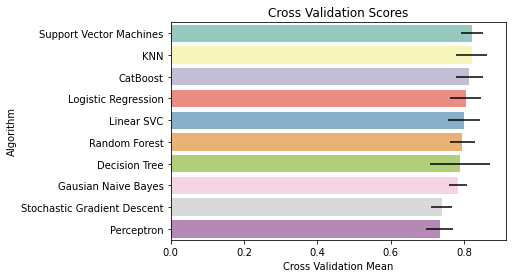

In [122]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

In [123]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.830 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.795 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.801 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.831 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.835 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.830 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.784 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.864 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.802 total time=   0.0s
[CV 2/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [124]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [125]:
svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [126]:
cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297242083758938

In [128]:
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [129]:
len(Y_pred)

418

In [130]:
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [132]:
# Create and save csv file 

submit.to_csv("C:/Users/user/Documents/data sci class/kaggle/titanic/svm_titanic.csv", index = False)